# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Stroke Data Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-block alert-warning">

# <span style=" color:red"> Stroke Data Project
</span>

Welcome to the data analysis assignment on the Stroke Data Project! In this assignment, we will work with a dataset containing information about various strokes. According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get a stroke based on input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient. Through this analysis, you will gain hands-on experience in essential data analysis steps, including data cleaning, visualization, and exploratory data analysis (EDA).

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Import Libraries, Loading the Dataset and Initial Exploration
</span>

- Load the dataset, display first few rows, check the structure of the dataset.

- Inspect the data types and missing values using df.info()

- Get basic statistics for numerical columns with df.describe()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib.font_manager import FontProperties

In [6]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv") 
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [7]:
df = data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
from skimpy import skim

In [10]:
skim(df[['age', 'bmi', 'avg_glucose_level']])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5110   │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 3      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ age                  │    0 │     0 │  43.23 │  22.61 │   0.08 │     25 │     45 │     61 │    82 │ ▅▆▇▇▇▆ │  │
│ │ bmi                  │  201 │  3.93 │  28.89 │  7.854 │   10.3 │   23.5 │   28.1 │   33.1 │  97.6 │  ▅▇▁   │  │
│ │ avg_glucose_level    │    0 │     0 │  106.1 │  45.28 │  55.12 │  77.25 │  91.88 │  114.1 │ 271.7 │ ▇▅▁▁▁  │  │
│ └──────────────────────┴──────┴───────┴────────┴────────┴────────┴────────┴────────┴────────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [11]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

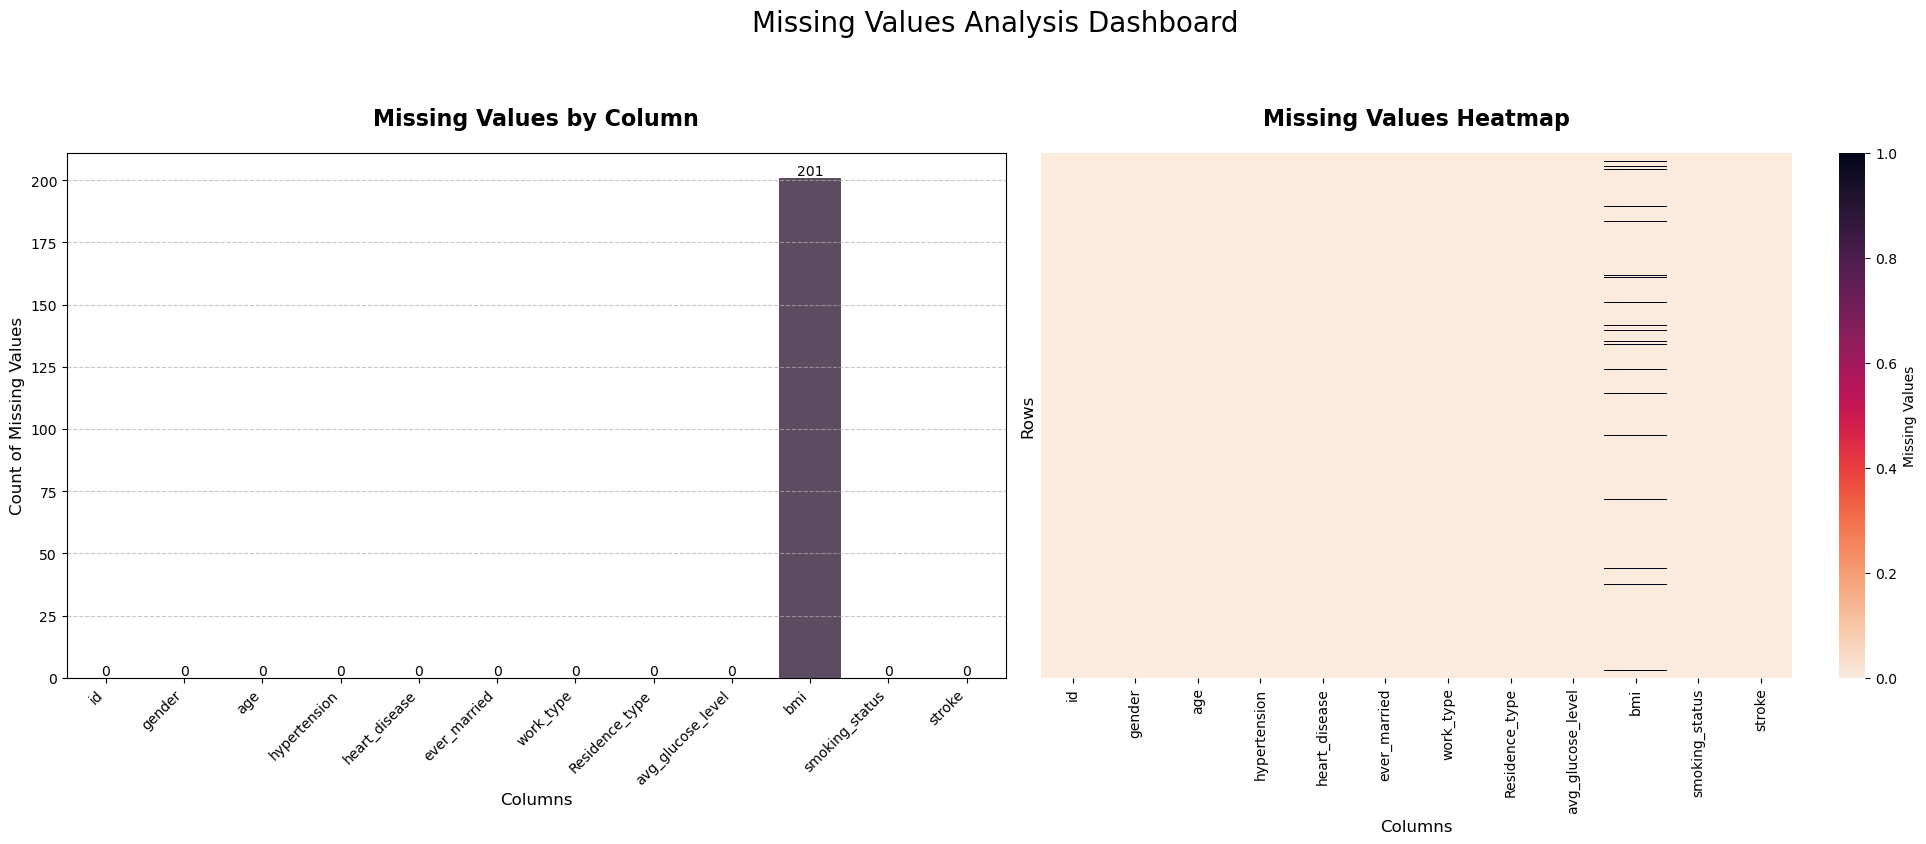

In [12]:
fig = plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
missing_values = df.isnull().sum()
ax = sns.barplot(x=missing_values.index, y=missing_values.values, alpha=0.8, color='#35193e')
plt.title('Missing Values by Column', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(missing_values.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.heatmap(df.isnull(), 
            cmap='rocket_r',
            yticklabels=False,
            cbar_kws={'label': 'Missing Values'})
plt.title('Missing Values Heatmap', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)

plt.suptitle('Missing Values Analysis Dashboard', fontsize=20, y=1.05)
plt.tight_layout()

plt.show()

🔴 Missing Data Detection (Missing Value)

- The only missing value was detected only in the BMI column.
- These missing values ​​were visualized with heatmap and msgno.

---

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 
</span>

- Handle missing values.

- Check for duplicates and remove them if found.

- Standardize column names (if necessary) for consistent naming conventions.

- Validate data types and convert columns to appropriate types if needed.

In [19]:
df.columns = df.columns.str.title()
df.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'Bmi',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [20]:
df.rename(columns={'Bmi': 'BMI', 'Id': 'ID'}, inplace=True)
df.columns

Index(['ID', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [21]:
df.dtypes

ID                     int64
Gender                object
Age                  float64
Hypertension           int64
Heart_Disease          int64
Ever_Married          object
Work_Type             object
Residence_Type        object
Avg_Glucose_Level    float64
BMI                  float64
Smoking_Status        object
Stroke                 int64
dtype: object

In [22]:
def categorize_age(age):
    if age >= 0 and age <= 1:
        return 'Infant'
    elif age >1 and age <= 3:
        return 'Toddler'
    elif age >3 and age <= 6:
        return 'Preschooler'
    elif age > 6 and age <= 12:
        return 'School Age'
    elif age > 12 and age < 20:
        return 'Teenager'
    elif age >= 20 and age <= 24:
        return 'Adolescense'
    elif age > 24 and age <= 39:
        return 'Adult'
    elif age > 39 and age <= 59:
        return 'Middle Aged'
    else:
        return 'Senior'

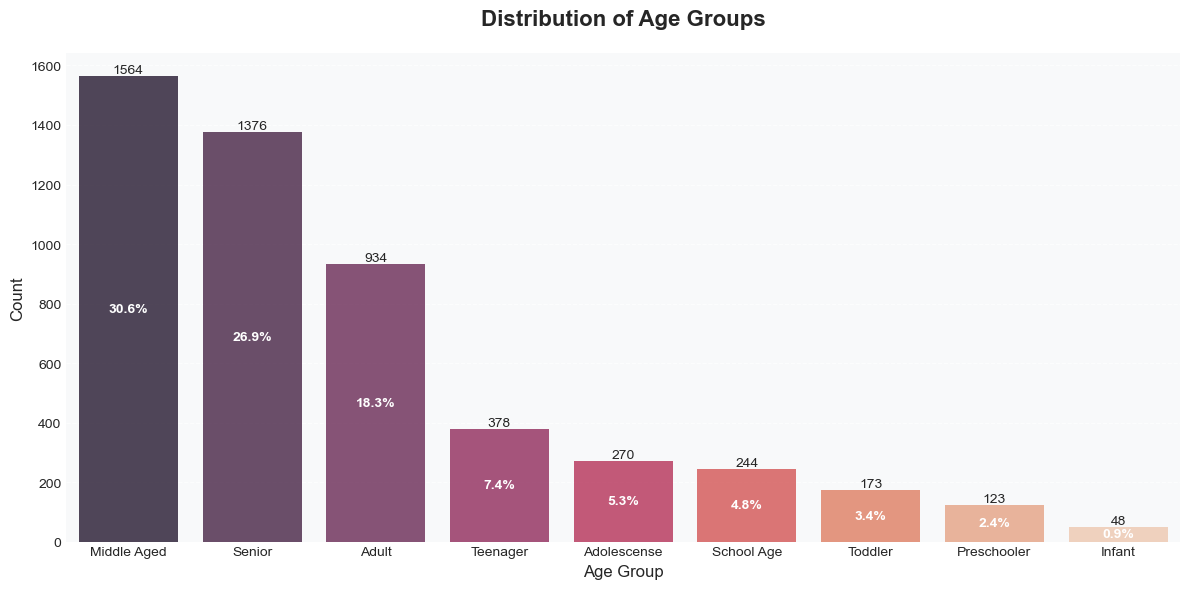

In [23]:
df['Age_Group'] = df['Age'].apply(categorize_age)

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 6))

age_counts = df['Age_Group'].value_counts()
ax = sns.barplot(x=age_counts.index, 
                 y=age_counts.values,
                 palette='rocket',
                 alpha=0.8)

plt.title('Distribution of Age Groups', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, v in enumerate(age_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.xticks(rotation=0)


ax.set_facecolor('#f8f9fa')


total = age_counts.sum()
for i, v in enumerate(age_counts.values):
    percentage = (v/total) * 100
    ax.text(i, v/2, f'{percentage:.1f}%', 
            ha='center', 
            va='center',
            color='white',
            fontweight='bold')

plt.tight_layout()

plt.show()

🔢 Creating Age Groups

- Since there are different age groups in the data, a new column/variable was created for more detailed analysis.
- The Age Group column we just created is shown on the chart. 📊

---

In [29]:
df.duplicated().sum()

0

In [30]:
df = df[df['Gender'] != 'Other']

In [31]:
df.Gender.value_counts()

Gender
Female    2994
Male      2115
Name: count, dtype: int64

🚨 Data Cleaning and Editing

- We found that there was only one value in the Gender column as "Other".
- For this reason, we deleted the relevant row from our data.
- We made this edit so that the subsequent analysis would be more meaningful and accurate. 🔧📊

---

### Missing Value

In [38]:
df.isnull().sum()

ID                     0
Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Ever_Married           0
Work_Type              0
Residence_Type         0
Avg_Glucose_Level      0
BMI                  201
Smoking_Status         0
Stroke                 0
Age_Group              0
dtype: int64

In [39]:
df[df['BMI'] >=45]

ID  Gender   Age  Hypertension  Heart_Disease Ever_Married  \
21    13861  Female  52.0             1              0          Yes   
66    17004  Female  70.0             0              0          Yes   
79    42117    Male  43.0             0              0          Yes   
113   41069  Female  45.0             0              0          Yes   
163   20426  Female  78.0             1              0           No   
...     ...     ...   ...           ...            ...          ...   
4976  63656  Female  18.0             0              0           No   
5009  40732  Female  50.0             0              0          Yes   
5015  50140  Female  44.0             0              0          Yes   
5057  38349  Female  49.0             0              0          Yes   
5103  22127  Female  18.0             0              0           No   

          Work_Type Residence_Type  Avg_Glucose_Level   BMI   Smoking_Status  \
21    Self-employed          Urban             233.29  48.9     never smoked   
66          Private          Urban             221.58  47.5     never smoked   
79    Self-employed          Urban             143.43  45.9          Unknown   
113         Private          Rural             224.10  56.6     never smoked   
163         Private          Urban             203.87  45.7     never smoked   
...             ...            ...                ...   ...              ...   
4976        Private          Urban             101.95  46.0  formerly smoked   
5009  Self-employed          Rural             126.85  49.5  formerly smoked   
5015       Govt_job          Rural             133.24  45.0           smokes   
5057       Govt_job          Urban              69.92  47.6     never smoked   
5103        Private          Urban              82.85  46.9          Unknown   

      Stroke    Age_Group  
21         1  Middle Aged  
66         1       Senior  
79         1  Middle Aged  
113        1  Middle Aged  
163        1       Senior  
...      ...          ...  
4976       0     Teenager  
5009       0  Middle Aged  
5015       0  Middle Aged  
5057       0  Middle Aged  
5103       0     Teenager  

[160 rows x 13 columns]

In [40]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

x = Q1 - 3 * IQR
y = Q3 + 3 * IQR

outliers = df[(df['BMI'] < x) | (df['BMI'] > y)]
outliers

ID  Gender   Age  Hypertension  Heart_Disease Ever_Married  \
358   66333    Male  52.0             0              0          Yes   
544     545    Male  42.0             0              0          Yes   
928   41097  Female  23.0             1              0           No   
1559  37759  Female  53.0             0              0          Yes   
2128  56420    Male  17.0             1              0           No   
2764  20292  Female  24.0             0              0          Yes   
4188  70670  Female  27.0             0              0          Yes   
4209  51856    Male  38.0             1              0          Yes   

          Work_Type Residence_Type  Avg_Glucose_Level   BMI Smoking_Status  \
358   Self-employed          Urban              78.40  64.8   never smoked   
544         Private          Rural             210.48  71.9   never smoked   
928         Private          Urban              70.03  78.0         smokes   
1559        Private          Rural              72.63  66.8        Unknown   
2128        Private          Rural              61.67  97.6        Unknown   
2764        Private          Urban              85.55  63.3   never smoked   
4188        Private          Rural              57.96  64.4   never smoked   
4209        Private          Rural              56.90  92.0   never smoked   

      Stroke    Age_Group  
358        0  Middle Aged  
544        0  Middle Aged  
928        0  Adolescense  
1559       0  Middle Aged  
2128       0     Teenager  
2764       0  Adolescense  
4188       0        Adult  
4209       0        Adult

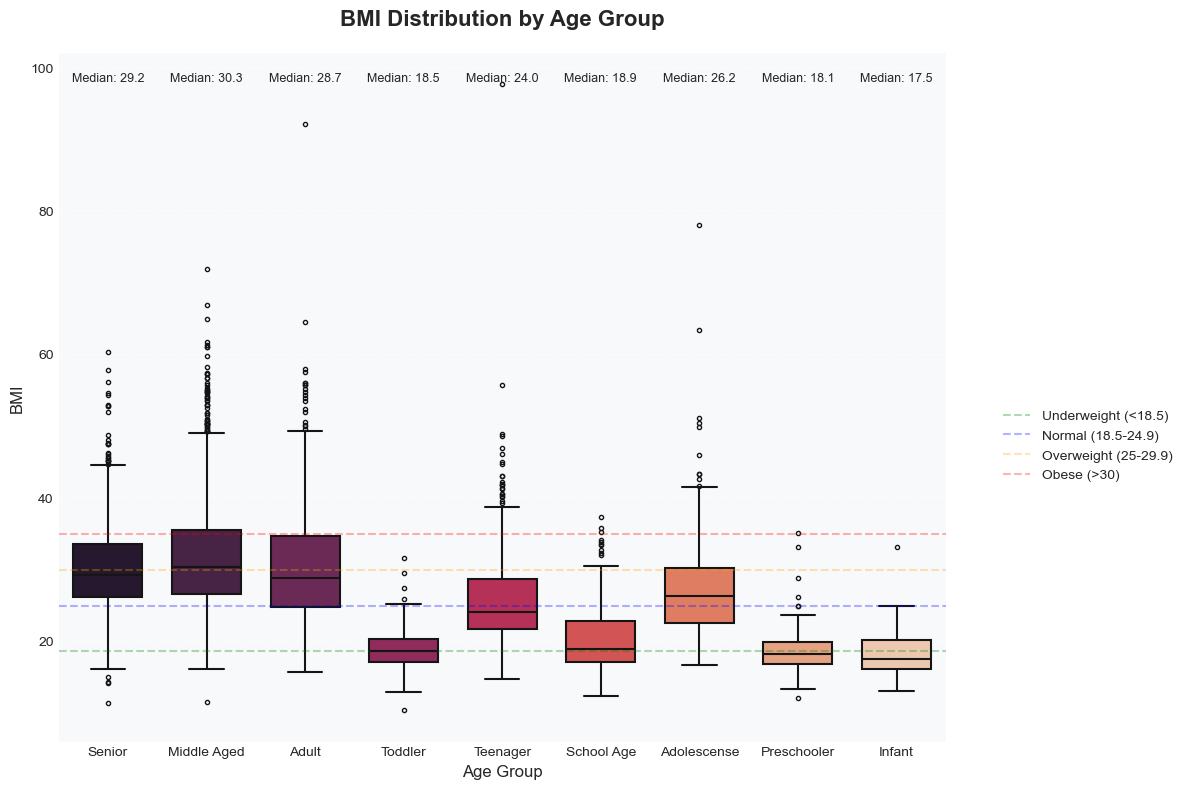

In [41]:
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 8))


ax = sns.boxplot(data=df,
                 x='Age_Group',
                 y='BMI',
                 palette='rocket',
                 width=0.7,
                 fliersize=3,
                 linewidth=1.5)


plt.title('BMI Distribution by Age Group', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('BMI', fontsize=12)

ax.set_facecolor('#f8f9fa')

ax.grid(axis='y', linestyle='--', alpha=0.7)


for i in range(len(df['Age_Group'].unique())):
    age_group = df['Age_Group'].unique()[i]
    median = df[df['Age_Group'] == age_group]['BMI'].median()
    ax.text(i, df['BMI'].max(), f'Median: {median:.1f}', 
            ha='center', va='bottom', fontsize=9)

plt.axhline(y=18.5, color='green', linestyle='--', alpha=0.3, label='Underweight (<18.5)')
plt.axhline(y=24.9, color='blue', linestyle='--', alpha=0.3, label='Normal (18.5-24.9)')
plt.axhline(y=29.9, color='orange', linestyle='--', alpha=0.3, label='Overweight (25-29.9)')
plt.axhline(y=34.9, color='red', linestyle='--', alpha=0.3, label='Obese (>30)')

plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left')

plt.tight_layout()

plt.show()

🧮 Missing Value Filling Stage

- We observed the BMI distributions of Age Groups and noticed that there was variability.
- For this reason, we decided to fill the missing value process for each age group. 🔄

---

In [47]:
bmi_avg_value = df.groupby(['Age_Group', 'Gender'])['BMI'].median().reset_index()

In [48]:
bmi_avg_value

Age_Group  Gender    BMI
0   Adolescense  Female  26.50
1   Adolescense    Male  25.75
2         Adult  Female  28.10
3         Adult    Male  29.90
4        Infant  Female  17.35
5        Infant    Male  18.30
6   Middle Aged  Female  29.80
7   Middle Aged    Male  30.80
8   Preschooler  Female  17.95
9   Preschooler    Male  18.10
10   School Age  Female  18.90
11   School Age    Male  18.80
12       Senior  Female  29.20
13       Senior    Male  29.40
14     Teenager  Female  24.15
15     Teenager    Male  23.95
16      Toddler  Female  18.10
17      Toddler    Male  18.90

In [49]:
df['BMI'] = df['BMI'].fillna(df.groupby(['Gender', 'Age_Group'])['BMI'].transform('median'))

In [50]:
df['BMI'].isnull().sum()

0

In [51]:
def categorize_BMI(bmi):
    if bmi  < 18.5:
        return 'Underweight'
    elif 18.5<= bmi <= 24.9:
        return 'Normal Weight'
    elif 24.9< bmi <= 29.9:
        return 'Overweight'
    elif 29.9< bmi <= 34.9:
        return 'Moderately Obese'
    elif 34.9< bmi <= 40:
        return 'Severely Obese'
    else:
        return 'Extreme Obese'

In [52]:
df['BMI_Group'] = df['BMI'].apply(categorize_BMI)

## Grouping Study Based on BMI Values ​​🏋️‍♀️📊

- In this study, a "**BMI_Group**" column was created to group individuals according to the classifications determined by **WHO (World Health Organization)** based on **BMI** values. 📝

- This column was used to analyze the data in more detail and to conduct an in-depth examination of **BMI-related health indicators**. 💪

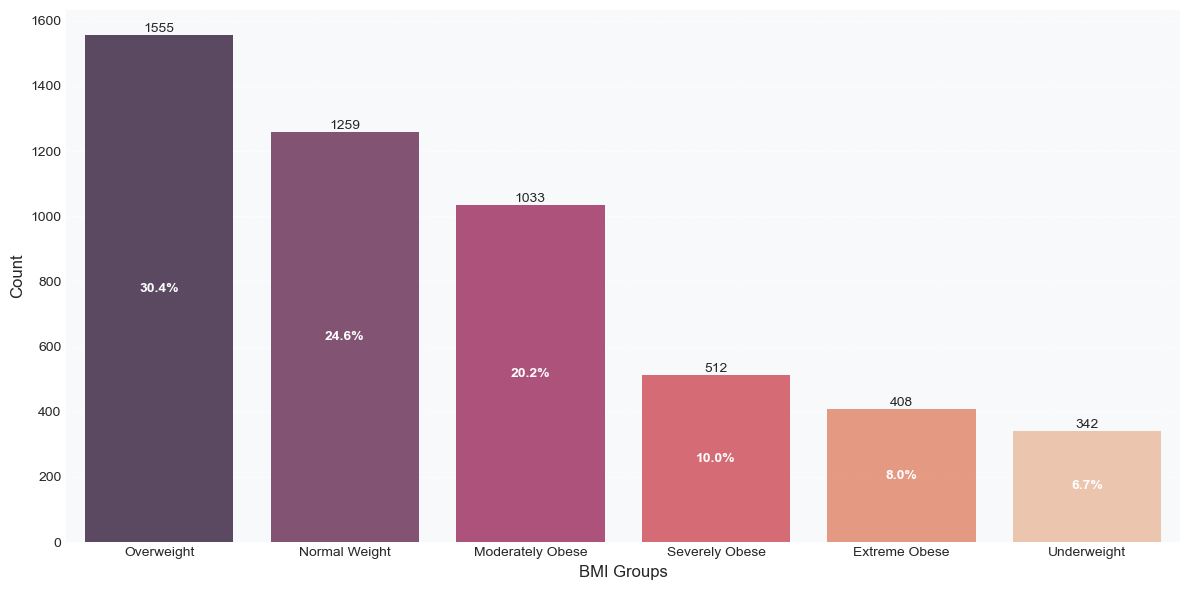

In [54]:
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 6))

bmi_counts = df['BMI_Group'].value_counts()
ax = sns.barplot(x=bmi_counts.index, 
                 y=bmi_counts.values,
                 palette='rocket',
                 alpha=0.8)

plt.xlabel('BMI Groups', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, v in enumerate(bmi_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.xticks(rotation=0)


ax.set_facecolor('#f8f9fa')


total = bmi_counts.sum()
for i, v in enumerate(bmi_counts.values):
    percentage = (v/total) * 100
    ax.text(i, v/2, f'{percentage:.1f}%', 
            ha='center', 
            va='center',
            color='white',
            fontweight='bold')

plt.tight_layout()

plt.show()

# Latest Status of BMI Groups 📊

This graph shows the latest status of **BMI groups** after the **missing value** filling process.

### Explanations:
- The graph visualizes the changes and distributions in each BMI group after the missing values ​​in the dataset are filled.
- This process makes the dataset more accurate and reliable.

In [56]:
df['Glucose_Level_Group'] = pd.cut(df['Avg_Glucose_Level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

## Glucose Level Based Grouping Study 🍬📊

- In this study, a "**Glucose_Level_Group**" column was created to analyze individuals based on their **glucose levels**. 📝

- This column was used to analyze the data in more detail and to conduct an in-depth examination of **health indicators related to glucose levels**. 💉💪

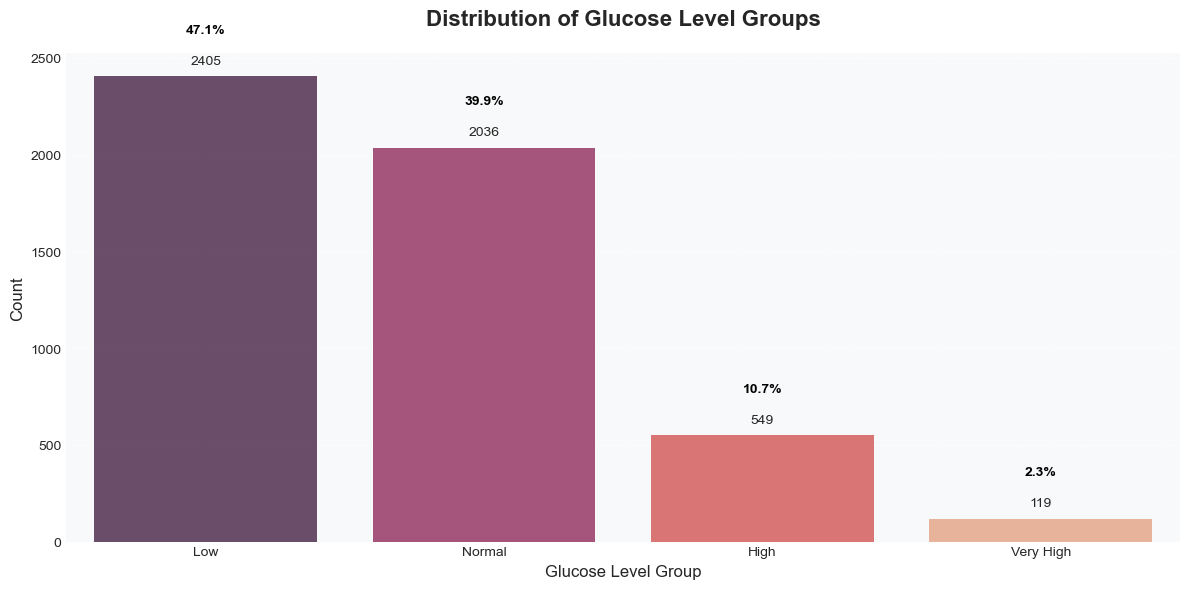

In [58]:
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 6))

glc_counts = df['Glucose_Level_Group'].value_counts()

ax = sns.barplot(x=glc_counts.index, 
                 y=glc_counts.values,
                 palette='rocket',
                 alpha=0.8)

plt.title('Distribution of Glucose Level Groups', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Glucose Level Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, v in enumerate(glc_counts.values):
    ax.text(i, v + 0.02 * glc_counts.max(), str(v), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=0)

ax.set_facecolor('#f8f9fa')

total = glc_counts.sum()
for i, v in enumerate(glc_counts.values):
    percentage = (v/total) * 100

    ax.text(i, v + 0.1 * glc_counts.max(), f'{percentage:.1f}%', 
            ha='center', 
            va='center',
            color='black',
            fontweight='bold')

plt.tight_layout()

plt.show()

## Glucose Level Analysis 🍬📊

In this study, individuals were classified according to their glucose levels and the rates for each category were determined:

- **Low Glucose Level** (Low): 47.1% 🍂
- **Normal Glucose Level** (Normal): 39.9% ⚖️
- **High Glucose Level** (High): 10.7% 🚨
- **Very High Glucose Level** (Very High): 2.3% 🔴

### Analysis:

- **Low Glucose Level (Low)**: 47.1% of individuals have low glucose levels. This group usually consists of individuals at risk of hypoglycemia. Low glucose levels can lead to energy deficiencies and various health problems.

- **Normal Glucose Level (Normal)**: 39.9% have normal glucose levels, which represents the majority of healthy individuals. Normal levels indicate that metabolism and body functions are functioning properly.

- **High Glucose Level (High)**: 10.7% have high glucose levels. These individuals may be at risk for prediabetes or diabetes. At this level, it is important to regularly monitor and control glucose.

- **Very High Glucose Level (Very High)**: 2.3% have very high glucose levels. This condition usually indicates more advanced stages of diabetes and may require urgent intervention.

These rates show that a large portion of the population has normal glucose levels, but a significant portion also has high and very high glucose levels. Such analyses are useful for understanding the effects of glucose levels on health and taking preventive measures.

---

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal
</span>

<div class="alert alert-block alert-success">

### <span style=" color:red"> How does age influence stroke occurrence?
</span>

In [66]:
stroke_positive = df[df['Stroke'] == 1]
stroke_negative = df[df['Stroke'] == 0]

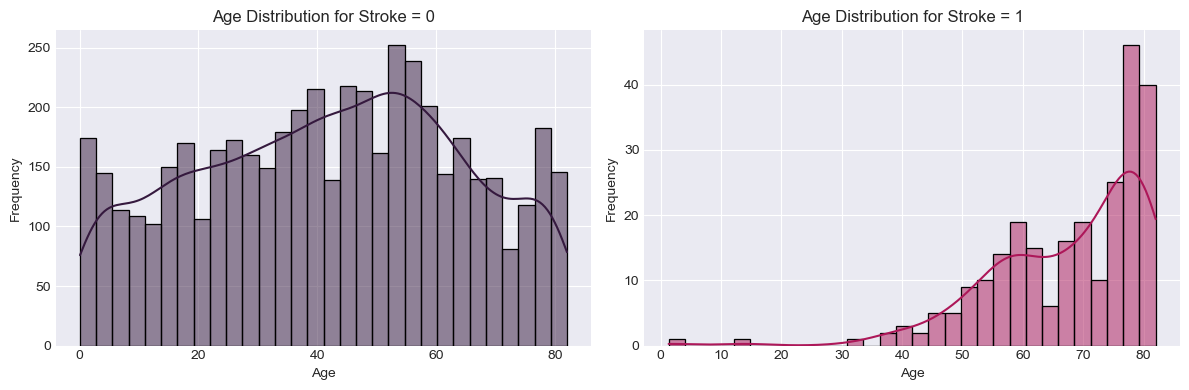

In [67]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=stroke_negative, x='Age', bins=30, kde=True, color='#35193e', ax=axes[0])
axes[0].set_title('Age Distribution for Stroke = 0')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.histplot(data=stroke_positive, x='Age', bins=30, kde=True, color='#ad1759', ax=axes[1])
axes[1].set_title('Age Distribution for Stroke = 1')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

---

🧠 Stroke Occurrence and Age Distribution 📊
The analysis of stroke cases across different age groups reveals several key patterns:

Key Observations
🟠 Stroke Concentration Among Older Individuals

Stroke occurrences begin to rise significantly around age 45 and reach a peak around age 80.
The highest prevalence is observed between the ages of 75 and 80, highlighting the critical impact of advanced age on stroke risk.
The distribution shows positive skewness, indicating a higher frequency of strokes in older populations.
🟢 Rare Incidence in Younger Populations

Individuals under 40, particularly those younger than 30, experience minimal stroke occurrences.
This trend suggests a substantially lower stroke risk for younger age groups.
Supporting Visual Insights
📈 The density curve mirrors the histogram’s pattern, displaying a gradual increase in stroke likelihood starting from middle age and peaking at 70+ years.
The smooth curve emphasizes a consistent rise in stroke prevalence with age.
Conclusions and Recommendations
✅ Age is a pivotal determinant of stroke risk, with a sharp increase in prevalence from age 50 onward.

🏥 Preventive measures and interventions targeting middle-aged and elderly populations are crucial to reducing stroke incidence.

🔍 For the stroke-negative group (Stroke = 0), the data does not reveal a clear trend, making it difficult to draw definitive insights.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Do body mass index (BMI) and glucose levels jointly or independently increase stroke risk?
</span>

In [74]:
stroke_negative = df[df['Stroke'] == 0]
stroke_positive = df[df['Stroke'] == 1]
correlation_positive = stroke_positive[['BMI', 'Avg_Glucose_Level']].corr()
correlation_negative = stroke_negative[['BMI', 'Avg_Glucose_Level']].corr()


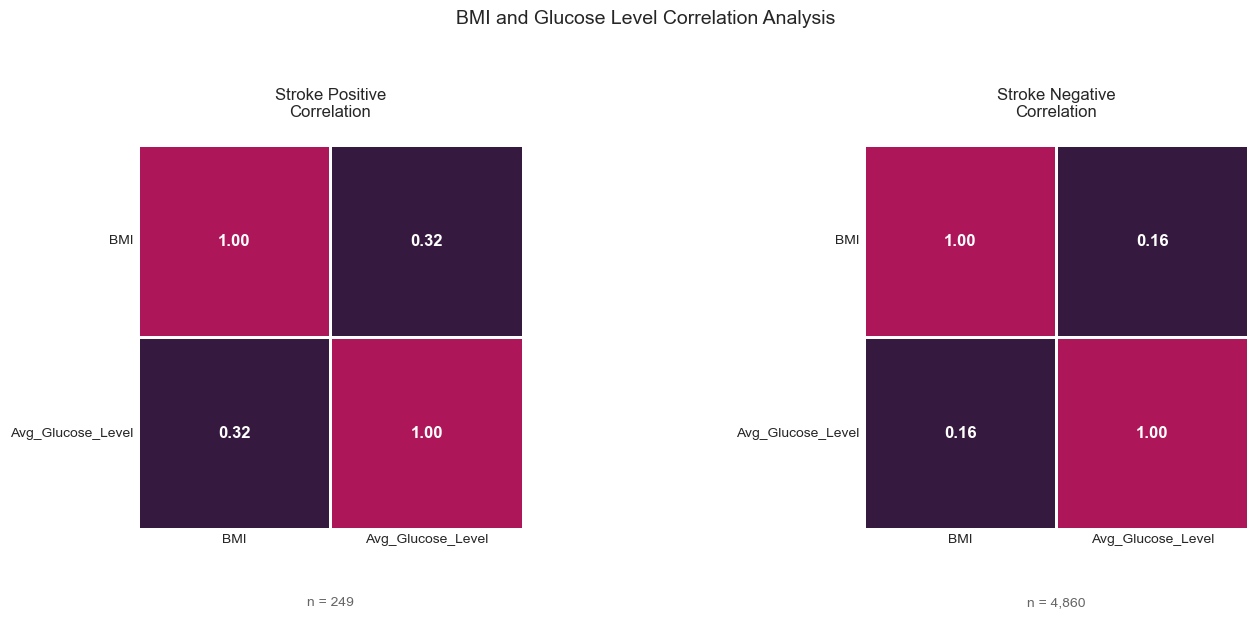

In [75]:
# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Custom dark purple and rose red colormap
dark_purple_rose_red_cmap = sns.color_palette(["#35193e", "#ad1759"], as_cmap=True)

# First heatmap (Positive cases)
sns.heatmap(correlation_positive, 
            annot=True,
            cmap=dark_purple_rose_red_cmap,
            fmt='.2f',
            square=True,
            cbar=False,
            ax=ax1,
            annot_kws={'size': 12, 'weight': 'bold'},
            linewidths=2,
            linecolor='white')

ax1.set_title('Stroke Positive\nCorrelation', 
              pad=20, 
              fontsize=12, 
              fontweight='light',
              family='sans-serif')

# Second heatmap (Negative cases)
sns.heatmap(correlation_negative, 
            annot=True,
            cmap=dark_purple_rose_red_cmap,
            fmt='.2f',
            square=True,
            cbar=False,
            ax=ax2,
            annot_kws={'size': 12, 'weight': 'bold'},
            linewidths=2,
            linecolor='white')

ax2.set_title('Stroke Negative\nCorrelation', 
              pad=20, 
              fontsize=12, 
              fontweight='light',
              family='sans-serif')

# Add minimal sample size information
for ax, data, title in [(ax1, stroke_positive, 'Positive'), 
                        (ax2, stroke_negative, 'Negative')]:
    ax.text(0.5, -0.2, 
            f'n = {len(data):,}', 
            transform=ax.transAxes, 
            fontsize=10,
            ha='center',
            color='#666666')
    
    # Clean up axes
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Add subtle main title
plt.suptitle('BMI and Glucose Level Correlation Analysis', 
             fontsize=14, 
             fontweight='light', 
             y=1.05,
             family='sans-serif')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Correlation Analysis Between Glucose and BMI 🧠📊

### General Findings:

- **General Correlation**: The correlation between glucose and BMI is generally **low**. This indicates that there is no direct relationship between glucose levels and body mass index (BMI). In other words, there is no strong link between glucose levels and BMI.

### Stroke Positive and Negative Categories:

- **Stroke Negatives**: For individuals who have not had a stroke, the correlation between glucose and BMI is **very low**. This means that there is no significant relationship between glucose levels and BMI.

- **Stroke Positives**: However, for individuals who have had a stroke, this correlation **doubled**. In other words, a more significant relationship was observed between glucose levels and BMI in individuals who have had a stroke. This suggests that health status and other factors may affect the relationship between glucose and BMI.

### Conclusion:

The relationship between glucose and BMI may vary depending on health factors such as stroke status. The relationship between these two variables becomes more pronounced in individuals who have had a stroke, while this relationship remains weaker in those who have not had a stroke.

---

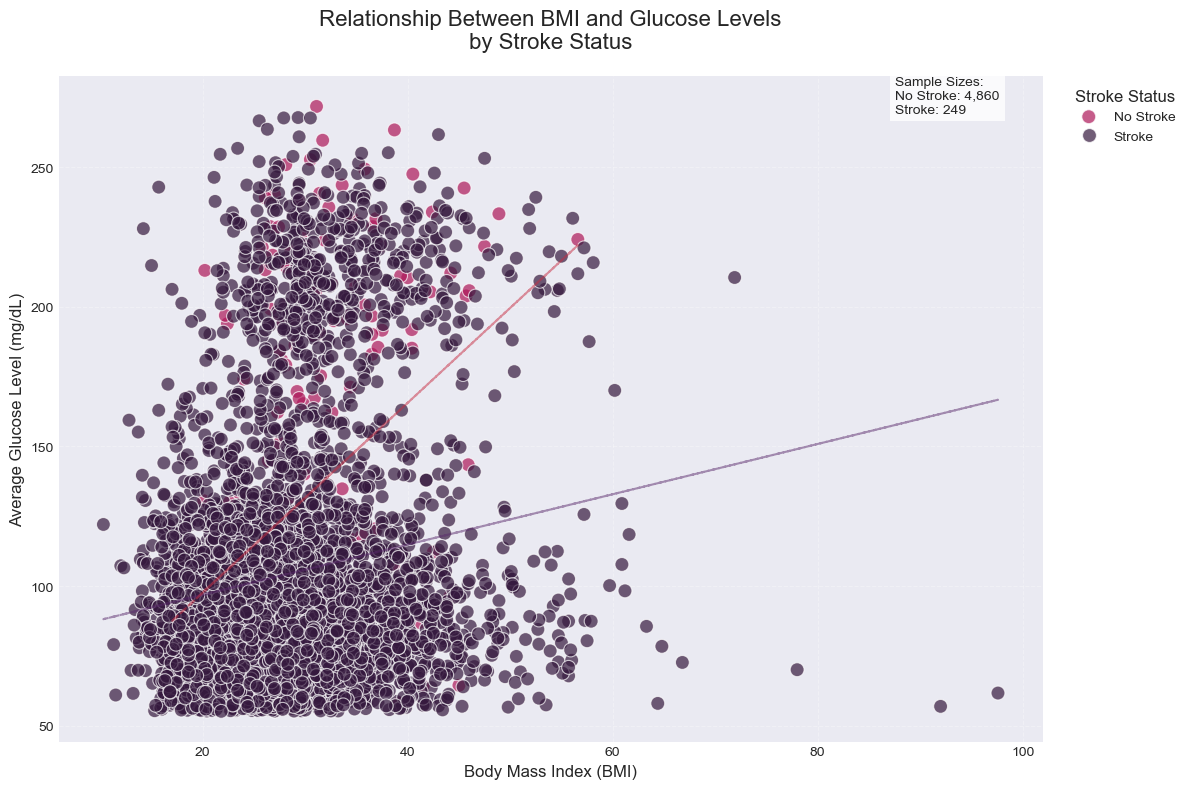

In [81]:
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=df,
    x='BMI',
    y='Avg_Glucose_Level',
    hue='Stroke',
    alpha=0.7,
    s=100, 
    palette={0: '#35193e', 1: '#ad1759'},  
    legend='brief'
)

for stroke_status in [0, 1]:
    mask = df['Stroke'] == stroke_status
    x = df[mask]['BMI']
    y = df[mask]['Avg_Glucose_Level']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), 
             linestyle='--', 
             alpha=0.5, 
             color='#5A2A6C' if stroke_status == 0 else '#C72C41')

plt.title('Relationship Between BMI and Glucose Levels\nby Stroke Status', 
         fontsize=16, 
         pad=20,
         fontweight='light',
         family='sans-serif')

plt.xlabel('Body Mass Index (BMI)', 
          fontsize=12, 
          fontweight='light')
plt.ylabel('Average Glucose Level (mg/dL)', 
          fontsize=12, 
          fontweight='light')

legend = plt.legend(title='Stroke Status',
                   labels=['No Stroke', 'Stroke'],
                   title_fontsize=12,
                   fontsize=10,
                   bbox_to_anchor=(1.02, 1),
                   loc='upper left')
legend.get_frame().set_alpha(0.9)
legend.get_frame().set_edgecolor('white')

plt.grid(True, linestyle='--', alpha=0.3)

stroke_counts = df['Stroke'].value_counts()
plt.text(0.85, 1, 
         f'Sample Sizes:\nNo Stroke: {stroke_counts[0]:,}\nStroke: {stroke_counts[1]:,}',
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

scatter.spines['top'].set_visible(False)
scatter.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

## Relationship Between BMI, Glucose Levels, and Stroke Risk 🧠🍬

The scatter plot shows the relationship between **Body Mass Index (BMI)**, **glucose levels**, and **stroke risk**:

### Stroke Cases (Red Dots) 🔴:
- **High Glucose Levels**: High glucose levels are strongly associated with stroke cases, indicating a **significant risk factor**.

- **BMI and Stroke Association**: The relationship between BMI and stroke is more scattered, although high BMI values ​​may contribute as a **risk factor** in some cases.

### Non-Stroke Cases (Blue Dots) 🔵:
- **Evenly Distributed**: These cases are more evenly distributed across **BMI and glucose levels**.

### Observations:
- **Glucose Levels**: High glucose levels appear to independently **increase the likelihood of stroke**, suggesting that glucose is a **significant risk factor**.
- **BMI**: The effect of BMI is less clear, but may play a **multiplying** role when combined with high glucose levels.

This analysis highlights the strong effect of glucose levels on stroke risk and how they may increase risk when combined with BMI. Further examination of the graph may help to better understand the health implications of these relationships.

---

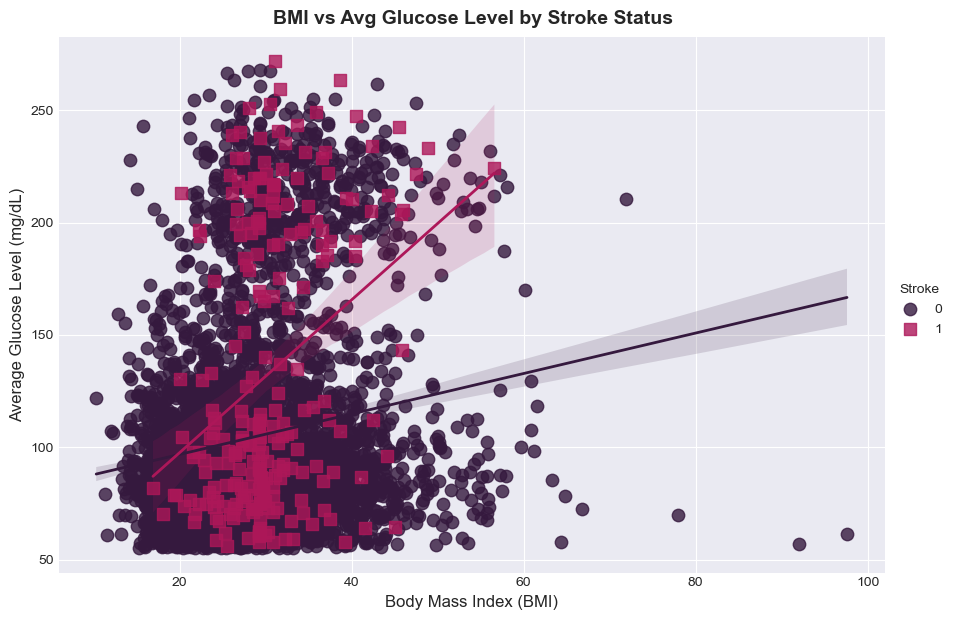

In [87]:
palette = {0: '#35193e', 1: '#ad1759'}

g = sns.lmplot(
    data=df,
    x='BMI',
    y='Avg_Glucose_Level',
    hue='Stroke',
    height=6,
    aspect=1.5,
    markers=['o', 's'],
    palette=palette,
    scatter_kws={'s': 80, 'alpha': 0.8}, 
    line_kws={'linewidth': 2}            
)

g.set_axis_labels("Body Mass Index (BMI)", "Average Glucose Level (mg/dL)", fontsize=12)
g.fig.suptitle("BMI vs Avg Glucose Level by Stroke Status", y=1.02, fontsize=14, weight='bold')

plt.show()

## Regression Lines and Stroke Risk Relationship 📉🧠

The regression lines show different trends for **stroke-experiencing** and **non-stroke-experiencing** individuals:

### Stroke Cases (Stroke = 1) 🔴:
- **Steeper Positive Trend**: The regression line has a steeper **positive slope** for individuals who have had a stroke. This suggests that **higher BMI** and **higher glucose levels** are more strongly associated with stroke occurrence.
- **Very High Values**: Individuals with very high BMI and glucose levels (upper right corner of the graph) are more heavily concentrated in the **Stroke = 1** group. This supports the hypothesis that these factors together increase the risk of stroke.

### Stroke-Free Cases (Stroke = 0) 🔵:
- **Slighter Trend**: The regression line has a **slighter slope** for individuals without a stroke, suggesting a weaker relationship between **BMI**, **glucose levels** and the absence of stroke.

### Observations at Low Values ​​🌱:
- **Low BMI and Glucose Levels**: There is a **significant overlap** between the two groups (Stroke = 0 and Stroke = 1) in low BMI and glucose levels (lower left corner of the graph). This suggests that these factors may not have a strong effect on stroke risk at low levels, independently or together.

### Outliers ⚠️:
- **Extremely High Values**: There are a few **outliers** in both groups with extremely high BMI and/or glucose levels. Further **research** may be needed to understand the impact of these cases on the analysis.

### Conclusion:
- **Steeper Regression Line**: The steeper the regression line for **Stroke = 1**, the stronger the association between **BMI and glucose levels** (combined) with stroke risk. This highlights the importance of these factors as **critical risk factors**.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Can smoking increase the likelihood of stroke?
</span>

In [94]:
df['Smoking_Status'].value_counts()

Smoking_Status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

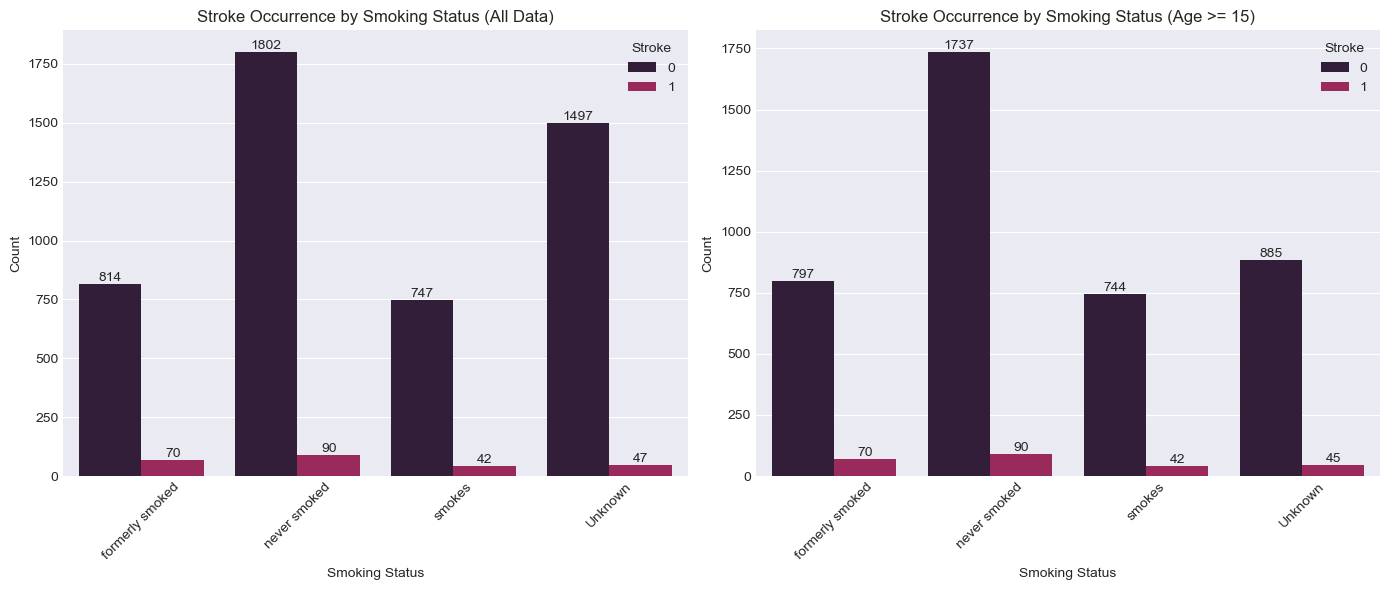

In [95]:
df_filtered = df[df['Age'] >= 15]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

palette = {0: '#35193e', 1: '#ad1759'} 

sns.countplot(data=df, x='Smoking_Status', hue='Stroke', ax=axes[0], palette=palette)
axes[0].set_title('Stroke Occurrence by Smoking Status (All Data)')
axes[0].set_xlabel('Smoking Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

sns.countplot(data=df_filtered, x='Smoking_Status', hue='Stroke', ax=axes[1], palette=palette)
axes[1].set_title('Stroke Occurrence by Smoking Status (Age >= 15)')
axes[1].set_xlabel('Smoking Status')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d')

plt.tight_layout()

plt.show()

---

## General Comparison and Comment 🧠📊

### Population Change:
- **When Individuals Under 15 Are Removed**:

- There is a **significant decrease** in the number of individuals in the "Unknown" category. This clearly shows the effect of the age group restriction on the data.
- In other categories, especially the "Formerly smoked" and "Smokes" categories, the population is **less affected**. This shows that the age group restriction is less effective in these categories.

### Stroke Rates:
- **Individuals Who Have Had a Stroke**:
- The number of individuals who have had a stroke in all categories remains **low**. This shows that the number of stroke cases in the population is generally limited.
- When the age group restriction is applied, there is no **significant difference** between the categories. In other words, age does not significantly change the stroke rates.

### Never smoked:
- **Largest population**: For both total data and **age ≥15**, the largest population is in the **non-smokers** category. This suggests that the health effects of not smoking are significant, especially in terms of stroke and other health problems.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Do individuals with heart disease face a higher stroke risk?
</span>

In [102]:
grouped = df.groupby('Heart_Disease')['Stroke'].mean().reset_index()

In [103]:
grouped

Heart_Disease    Stroke
0              0  0.041796
1              1  0.170290

In [104]:
df_grouped = df.groupby(['Heart_Disease', 'Stroke']).size().unstack(fill_value=0)

In [105]:
df_grouped_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

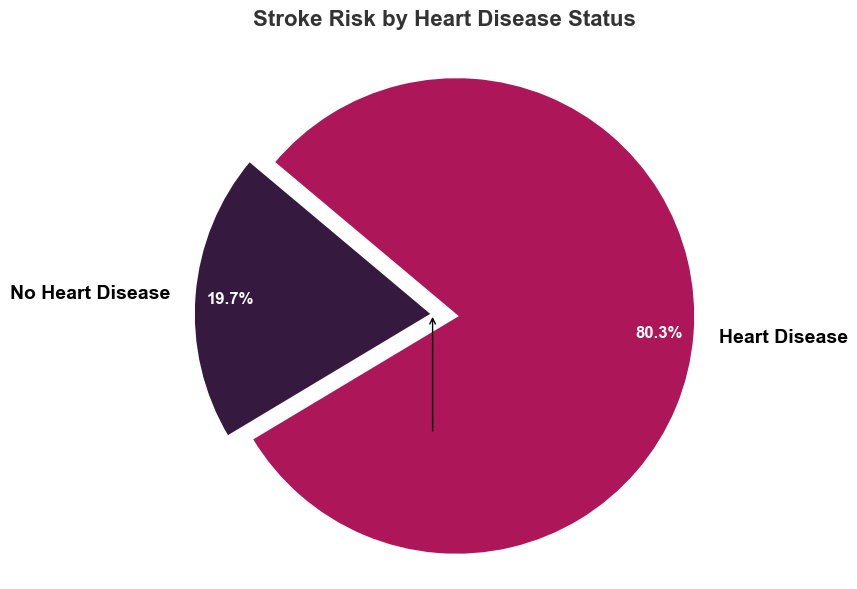

In [106]:
labels = ['No Heart Disease', 'Heart Disease']
sizes = df_grouped_percent[1]
colors = ['#35193e', '#ad1759']  
explode = [0, 0.1]  

fig, ax = plt.subplots(figsize=(8, 6)) 
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  
    startangle=140,  
    colors=colors,
    explode=explode,
    pctdistance=0.85,  
    wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'linestyle': 'solid'}  
)

plt.setp(autotexts, size=12, weight="bold", color='white')
plt.setp(texts, size=14, weight="bold", color='black')  
ax.set_title('Stroke Risk by Heart Disease Status', fontsize=16, weight='bold', color='#333333', pad=20)  

ax.annotate('', xy=(0, 0), xytext=(0, -0.5),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))

ax.axis('equal')

plt.tight_layout()
plt.show()


## The Relationship Between Heart Disease and Stroke 💓🧠

- **Individuals with heart disease** have a 60% higher risk of having a **stroke**.

- This means that individuals with heart disease have a **300% increased** risk of having a stroke.

- **Since there is a strong link between heart disease and stroke, it is especially important for individuals with heart disease to **undergo regular health checks** and **take preventive measures**.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Does work-related stress contribute to hypertension and subsequently to strokes?
</span>

In [113]:
grouped = df.groupby('Work_Type')[['Hypertension', 'Stroke']].mean() 

In [114]:
grouped

Hypertension    Stroke
Work_Type                            
Govt_job           0.111111  0.050228
Never_worked       0.000000  0.000000
Private            0.096101  0.050958
Self-employed      0.175824  0.079365
children           0.000000  0.002911

In [115]:
stress_analysis = round(df.groupby('Work_Type')[['Hypertension', 'Stroke']].mean() * 100,2)
stress_analysis = stress_analysis.rename(columns={'Hypertension': 'Hypertension Rate (%)', 'Stroke': 'Stroke Rate (%)'})


fig = px.imshow(stress_analysis.T,  
                labels={'x': 'Work Type', 'y': 'Indicator'},
                x=stress_analysis.index,  
                y=stress_analysis.columns,  
                color_continuous_scale=['#35193e', '#ad1759'], 
                color_continuous_midpoint=50,  
                title='High Blood Pressure and Stroke Rates by Job Type',
                text_auto=True, 
                height=600, width=800)  

fig.update_layout(
    title_font_size=24,  
    title_font_family="Arial, sans-serif",  
    title_font_color='black',  
    xaxis_title_font_size=14, 
    yaxis_title_font_size=14,  
    font=dict(family="Arial, sans-serif", size=12, color='black'),  
    coloraxis_colorbar=dict(title='Oran (%)', tickvals=[0, 50, 100], ticktext=['0%', '50%', '100%'])  
)

fig.show()

## Relationship Between Hypertension and Stroke 💓🧠

- **In groups with high hypertension rates**, the **stroke rate** is also higher. This shows that hypertension is a **risk factor** for stroke.

- The **Self-employed** group is the group with the highest rates of both **hypertension** (17.58%) and **stroke** (7.94%).

- In the **Children** group, the **hypertension** rate is 0% and the **stroke** rate is 0.3%, making it the lowest risk group.

## Evaluation of Sectors Compared to Each Other 🏢👩‍⚕️

### **Self-employed**:
- It is considered the **highest risk group**. Both **hypertension** and **stroke** rates are the highest compared to other sectors. This can be attributed to irregular lifestyle, high stress and lack of health check-ups.

### **Government Employees (Govt_job) and Private Sector (Private)**:
- These two groups are quite similar. While the **hypertension** rate is slightly higher in government employees (11.11% vs. 9.61%), the **stroke** rate is slightly higher in private sector employees (5.09% vs. 5.02%). These groups can be considered as **medium risk**.

### **Never_worked and Children**:
- These two groups are the **lowest risk** groups. However, the fact that the stroke rate in children is **0.29%** is a matter of note.

---

In [121]:
df.Work_Type.value_counts()

Work_Type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

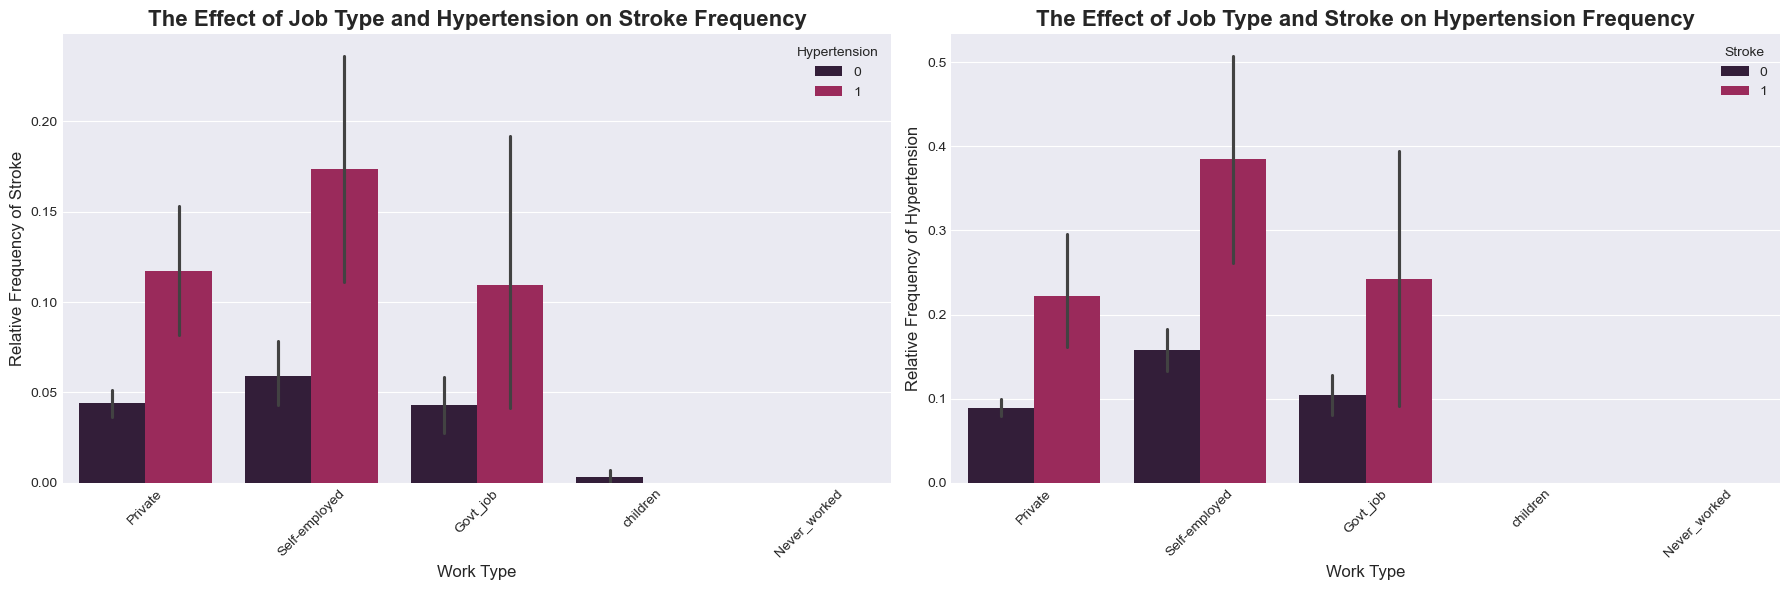

In [122]:
palette = {0: '#35193e', 1: '#ad1759'}  

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='Work_Type', y='Stroke', hue='Hypertension', data=df, palette=palette, ax=axes[0])
axes[0].set_title('The Effect of Job Type and Hypertension on Stroke Frequency', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Work Type', fontsize=12)
axes[0].set_ylabel('Relative Frequency of Stroke', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x='Work_Type', 
    y='Hypertension', 
    hue='Stroke', 
    data=df, 
    palette=palette, 
    ax=axes[1]
)
axes[1].set_title('The Effect of Job Type and Stroke on Hypertension Frequency', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Work Type', fontsize=12)
axes[1].set_ylabel('Relative Frequency of Hypertension', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

---

## Visualization: Relationship Between Stroke and Hypertension 📊

- The relationship matrix shown in the **heatmap** above is visualized with this **barchart** chart. This chart compares the **frequency of stroke** (with relative rates) in **individuals with and without hypertension** according to different occupational groups.

- ​​Also, this chart compares the **frequency of hypertension** according to stroke status in different **job types**.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Are males at higher risk of strokes due to work-related or lifestyle stress?
</span>

In [129]:
grouped_work_stress_male = df[df['Gender'] == 'Male' ].groupby(['Work_Type'])['Stroke'].mean().reset_index()
grouped_lifestyle_stress_male = df[df['Gender'] == 'Male'].groupby(['Smoking_Status', 'Ever_Married', 'BMI'])['Stroke'].mean().reset_index()

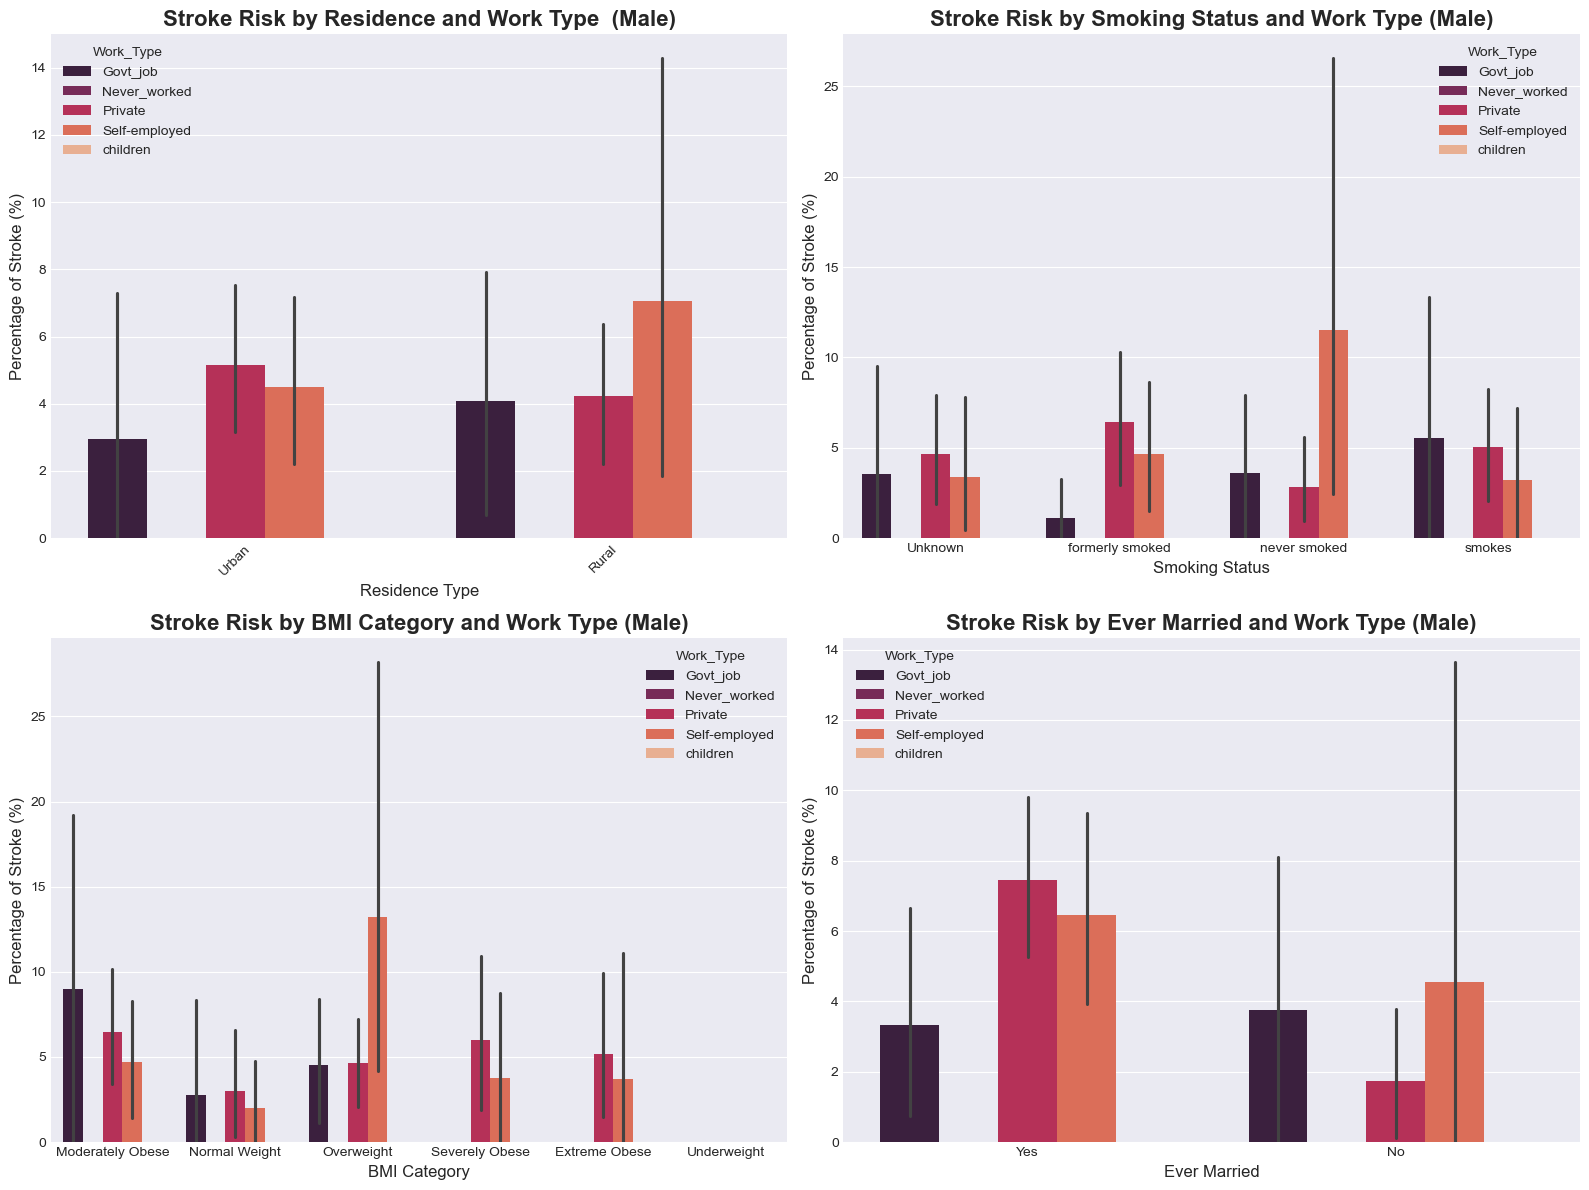

In [130]:
df_male = df[df['Gender'] == 'Male']

df_male_grouped = df_male.groupby(['Work_Type', 'Residence_Type', 'Smoking_Status', 'BMI_Group', 'Ever_Married', 'Stroke']).size().unstack(fill_value=0)

df_male_grouped_percent = df_male_grouped.div(df_male_grouped.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(x=df_male_grouped_percent.index.get_level_values('Residence_Type'), 
            y=df_male_grouped_percent[1], 
            hue=df_male_grouped_percent.index.get_level_values('Work_Type'),
            palette='rocket', ax=axes[0, 0])

axes[0, 0].set_title('Stroke Risk by Residence and Work Type  (Male)', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('Residence Type', fontsize=12)
axes[0, 0].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[0, 0].set_xticklabels(['Urban', 'Rural'], rotation=45)


sns.barplot(x=df_male_grouped_percent.index.get_level_values('Smoking_Status'), 
            y=df_male_grouped_percent[1], 
            hue=df_male_grouped_percent.index.get_level_values('Work_Type'),
            palette='rocket', ax=axes[0, 1])

axes[0, 1].set_title('Stroke Risk by Smoking Status and Work Type (Male)', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Smoking Status', fontsize=12)
axes[0, 1].set_ylabel('Percentage of Stroke (%)', fontsize=12)


sns.barplot(x=df_male_grouped_percent.index.get_level_values('BMI_Group'), 
            y=df_male_grouped_percent[1], 
            hue=df_male_grouped_percent.index.get_level_values('Work_Type'),
            palette='rocket', ax=axes[1, 0])

axes[1, 0].set_title('Stroke Risk by BMI Category and Work Type (Male)', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('BMI Category', fontsize=12)
axes[1, 0].set_ylabel('Percentage of Stroke (%)', fontsize=12)


sns.barplot(x=df_male_grouped_percent.index.get_level_values('Ever_Married'), 
            y=df_male_grouped_percent[1], 
            hue=df_male_grouped_percent.index.get_level_values('Work_Type'),
            palette='rocket', ax=axes[1, 1])

axes[1, 1].set_title('Stroke Risk by Ever Married and Work Type (Male)', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Ever Married', fontsize=12)
axes[1, 1].set_ylabel('Percentage of Stroke (%)', fontsize=12)

plt.tight_layout()   
plt.show()


---

### Stroke Risk by Residence and Work Type (Male) 🌍💼
1. **Rural Areas**:**
- Self-employed men have a higher **stroke risk** than other types of work.

2. **Urban Areas**:**
- **Stroke risk** is more evenly distributed, but again, the **Self-employed** group has a higher risk.

3. **Children and Never_worked Group:**
- The **stroke risk** is quite low in these groups.

#### General Comment:
- Men living in **rural areas** and working for themselves have a higher risk of stroke.

### Stroke Risk by Smoking Status and Work Type (Male) 🚬💼
1. **Never Smoked**:**
- Self-employed men have a higher **stroke risk** than other groups.

2. **Former Smokers**:**
- Stroke risk is more pronounced in the **Self-employed** group.

3. **Active Smokers**:**
- Stroke risk is again more pronounced in the **Self-employed** group.

4. **Children Group:**
- All smoking statuses carry a very low stroke risk.

#### General Comment:
- Smoking status increases the **stroke risk**, especially for **self-employed men**.

### Stroke Risk by BMI Category and Work Type (Male) ⚖️💼
1. **Overweight and Moderately Obese:**
- Self-employed men are the riskiest group in terms of **stroke risk**.

2. **Other BMI Categories (Severely Obese, Extreme Obese, Underweight):**
- **Stroke risk** is relatively lower and balanced.

3. **Children Category:**
- It carries a low stroke risk at every BMI level.

#### General Comment:
- In **overweight** or **mildly obese individuals**, **job type** has a significant effect on stroke risk; the risk is especially higher in the **Self-employed** group.

### Stroke Risk by Ever Married and Work Type (Male) 💍💼
1. **Married Status "Yes":**
- In **Self-employed** and **Private** job types, **stroke risk** is higher.

2. **Married Status "No":**
- **Stroke risk** is generally low, but is still more pronounced in the **Self-employed** category than in other groups.

3. **Children Category:**
- Stroke risk is quite low according to marriage status.

#### General Comment:
- **Married status** may be a factor that increases the risk of stroke, especially in **self-employed men**.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> How does the combination of risk factors amplify stroke likelihood?
</span>

In [140]:
df['Life_Style_Risk_Factor'] = df['Ever_Married'] + '_' + df['Smoking_Status'] + '_' + df['Residence_Type']

In [141]:
df['Life_Style_Risk_Factor']

0       Yes_formerly smoked_Urban
1          Yes_never smoked_Rural
2          Yes_never smoked_Rural
3                Yes_smokes_Urban
4          Yes_never smoked_Rural
                  ...            
5105       Yes_never smoked_Urban
5106       Yes_never smoked_Urban
5107       Yes_never smoked_Rural
5108    Yes_formerly smoked_Rural
5109            Yes_Unknown_Urban
Name: Life_Style_Risk_Factor, Length: 5109, dtype: object

In [142]:
df_40=  df[df['Age'] >= 40]
df['Composite_Variable'] = df_40['Ever_Married'] + '_' + df_40['Smoking_Status'] + '_' + df_40['Residence_Type']

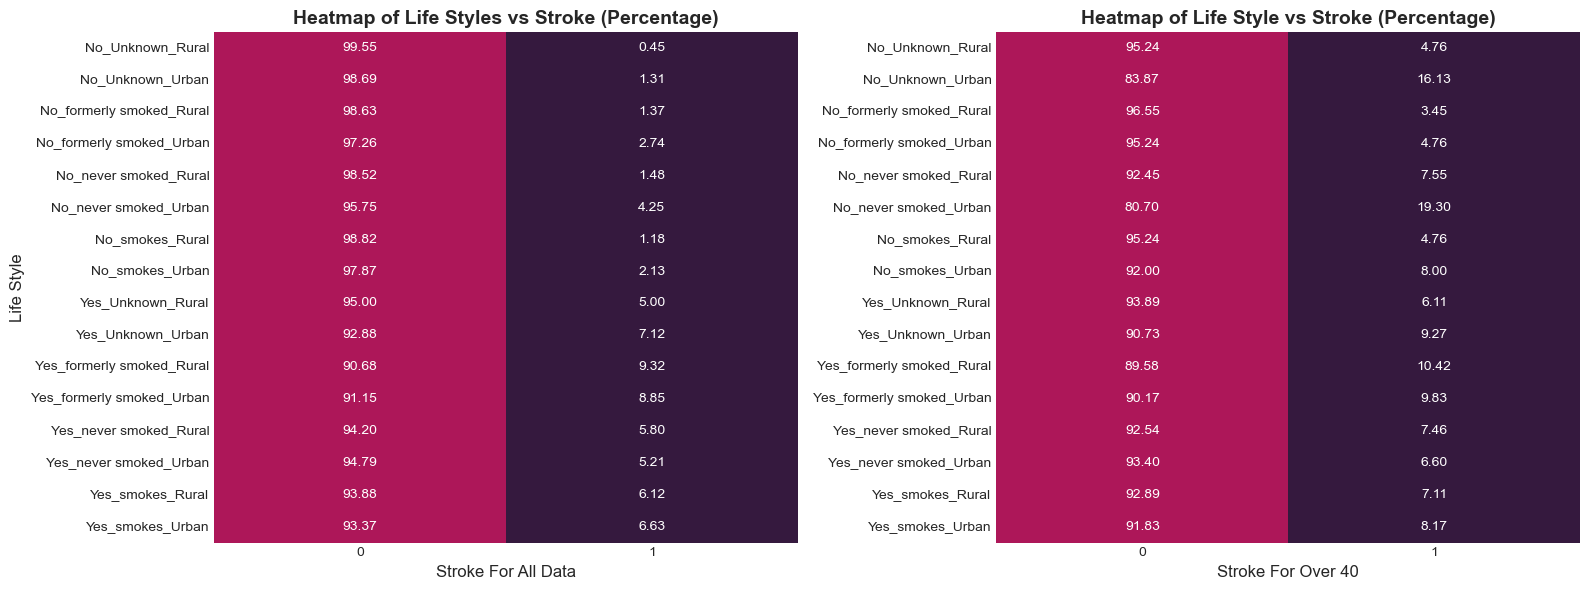

In [143]:
composit_counts_1 = pd.crosstab(df['Composite_Variable'], df['Stroke'])
composit_percent_1 = composit_counts_1.div(composit_counts_1.sum(axis=1), axis=0) * 100

composit_counts_2 = pd.crosstab(df['Life_Style_Risk_Factor'], df['Stroke'])
composit_percent_2 = composit_counts_2.div(composit_counts_2.sum(axis=1), axis=0) * 100


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(composit_percent_1, annot=True, fmt=".2f", cmap=dark_purple_rose_red_cmap, cbar=False, ax=axes[1])
axes[1].set_title('Heatmap of Life Style vs Stroke (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stroke For Over 40', fontsize=12)
axes[1].set_ylabel('', fontsize=12)

sns.heatmap(composit_percent_2, annot=True, fmt=".2f", cmap=dark_purple_rose_red_cmap, cbar=False, ax=axes[0])
axes[0].set_title('Heatmap of Life Styles vs Stroke (Percentage)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stroke For All Data', fontsize=12)
axes[0].set_ylabel('Life Style', fontsize=12)

plt.tight_layout()
plt.show()

---

## Stroke Risk by Age and Lifestyle Analysis 🧠👨‍⚕️

1. **Stroke = 0 (Those Without Stroke):**
- There are no significant differences between the **Entire Data Group** and the **Over 40 Group**. This suggests that age does not have a significant effect on stroke risk.

2. **Stroke = 1 (Those With Stroke):**
- The risk of stroke increases for the **Over 40 Group** in **all lifestyle categories**. This suggests that lifestyle factors increase the risk of stroke more significantly with age.

### Comments Related to the Graph:
- In order to better understand the differences between the **Entire Data Group** and the **Over 40 Group**, the following **bar graphs** have been created.

---

In [149]:
composit_percent_1[1] / composit_percent_2[1]

Composite_Variable
No_Unknown_Rural             10.523810
No_Unknown_Urban             12.338710
No_formerly smoked_Rural      2.517241
No_formerly smoked_Urban      1.738095
No_never smoked_Rural         5.113208
No_never smoked_Urban         4.543860
No_smokes_Rural               4.047619
No_smokes_Urban               3.760000
Yes_Unknown_Rural             1.221374
Yes_Unknown_Urban             1.302419
Yes_formerly smoked_Rural     1.118152
Yes_formerly smoked_Urban     1.109827
Yes_never smoked_Rural        1.287313
Yes_never smoked_Urban        1.267573
Yes_smokes_Rural              1.162531
Yes_smokes_Urban              1.233109
Name: 1, dtype: float64

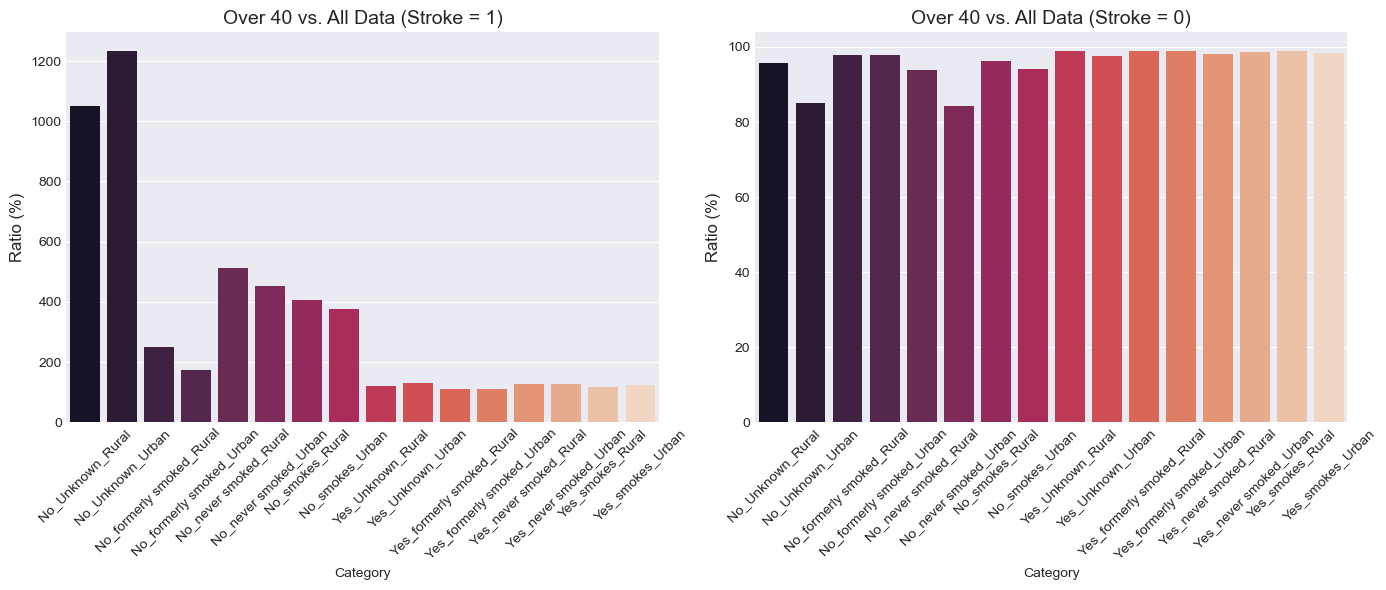

In [150]:
ratio_percent_1 = (composit_percent_1[1] / composit_percent_2[1]) * 100
ratio_percent_2 = (composit_percent_1[0] / composit_percent_2[0]) * 100

ratio_df_1 = pd.DataFrame({
    'Category': composit_percent_1.index,  
    'Ratio (%)': ratio_percent_1
}).reset_index(drop=True)

ratio_df_2 = pd.DataFrame({
    'Category': composit_percent_1.index,  
    'Ratio (%)': ratio_percent_2
}).reset_index(drop=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=ratio_df_1, x='Category', y='Ratio (%)', palette='rocket', ax=axes[0])
axes[0].set_title('Over 40 vs. All Data (Stroke = 1)', fontsize=14)
axes[0].set_xlabel('Category', fontsize=10)
axes[0].set_ylabel('Ratio (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=ratio_df_2, x='Category', y='Ratio (%)', palette='rocket', ax=axes[1])
axes[1].set_title('Over 40 vs. All Data (Stroke = 0)', fontsize=14)
axes[1].set_xlabel('Category', fontsize=10)
axes[1].set_ylabel('Ratio (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---

## Review of the 40 and Over Group 🔍

As a result of our reviews, we decided to review this group in more detail, based on the information that the **40 and over** age group has a **high** risk of stroke. For this reason, we created two different **heatmaps** as **all data** and **over 40**.

### Detailed Reviews:
- The **over 40 age group** has been observed to have a much higher **stroke risk** in **almost all categories** when all age groups are considered.
- This finding emphasizes that the risk of stroke increases with age and that special precautions should be taken for the health conditions of individuals in this group.

---

In [156]:
new_df = df.copy()

In [157]:
new_df['Hypertension'] = new_df['Hypertension'].replace({0: 'No', 1: 'Yes'})
new_df['Heart_Disease'] = new_df['Heart_Disease'].replace({0: 'No', 1: 'Yes'})

In [158]:
new_df['Health_Risk_Factors'] = new_df['Hypertension'] + '_' + new_df['Heart_Disease'] + '_' + new_df['BMI_Group']  

In [159]:
composit_counts2 = pd.crosstab(new_df['Health_Risk_Factors'], new_df['Stroke'])

In [160]:
composit_percent2 = composit_counts2.div(composit_counts2.sum(axis=1), axis=0) * 100

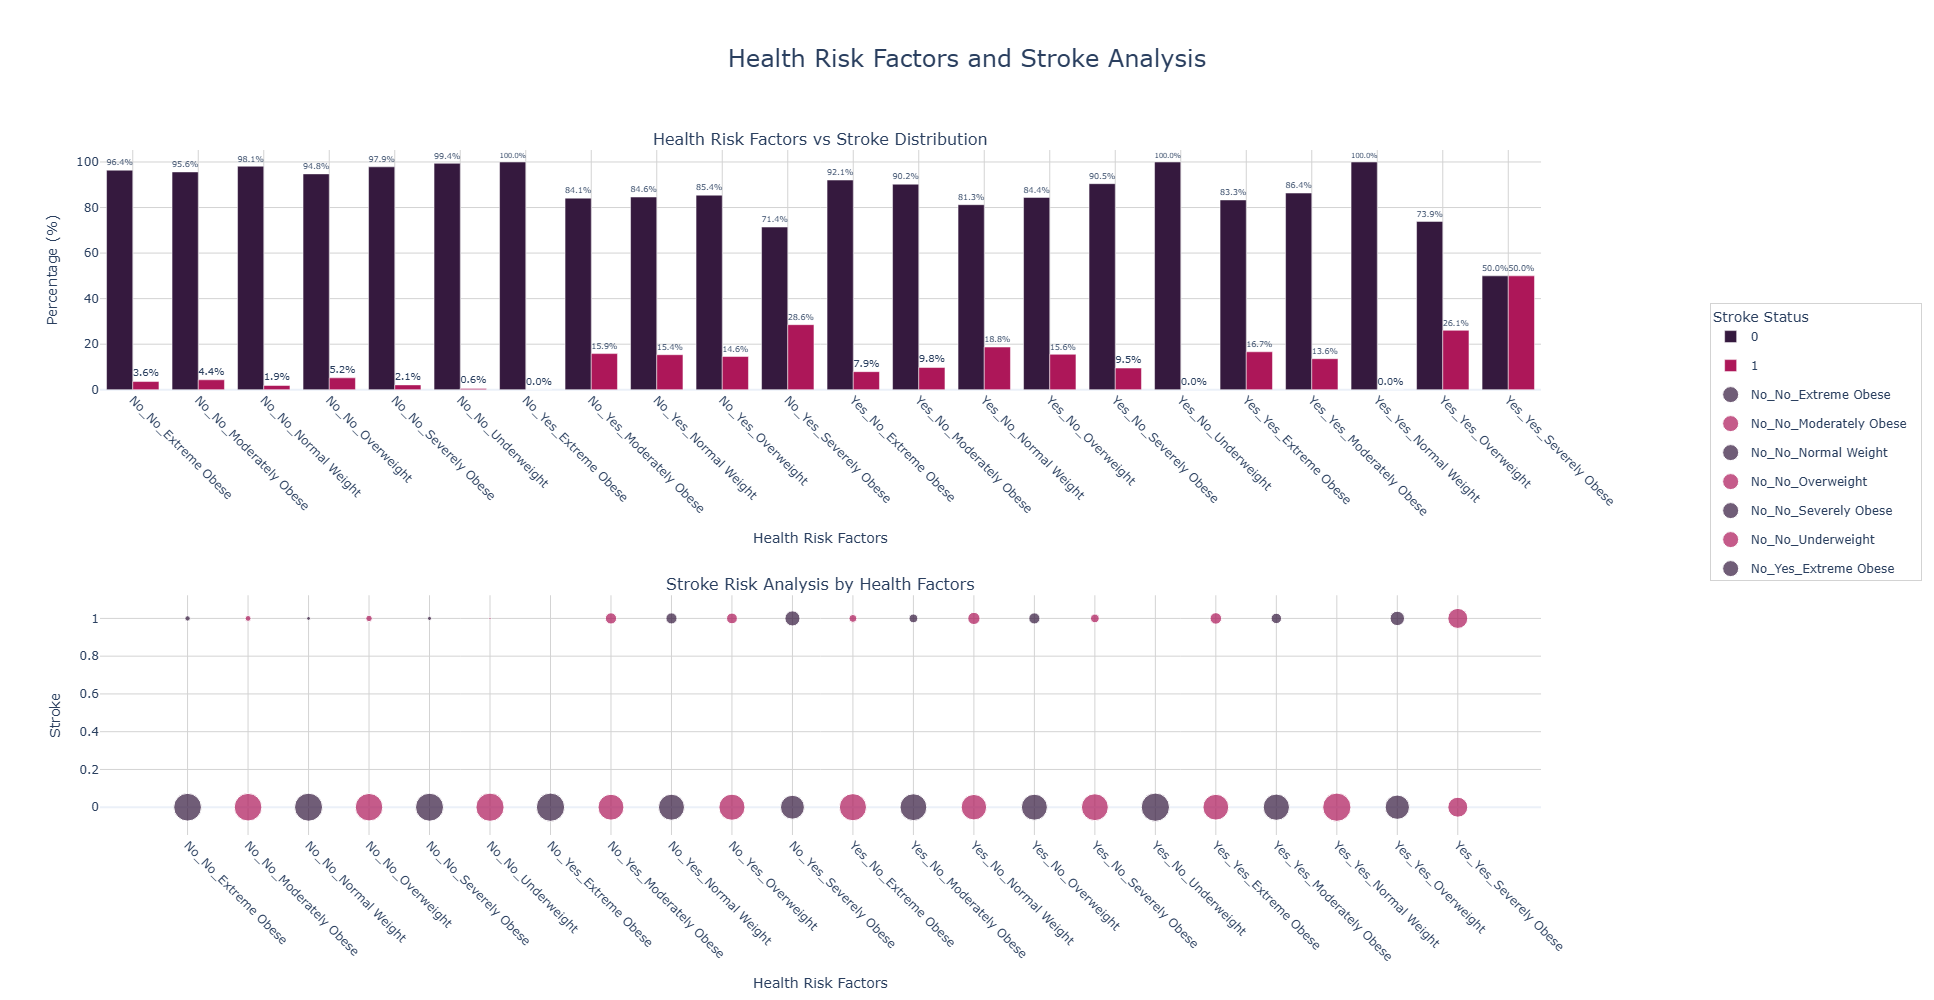

In [161]:
custom_colors = ['#35193e', '#ad1759']

# Verileri uzun formata dönüştür
composit_percent2_long = composit_percent2.reset_index().melt(
    id_vars='Health_Risk_Factors', 
    var_name='Stroke', 
    value_name='Percentage'
)

# Alt grafikler için figür oluştur
fig = make_subplots(
    rows=2, cols=1, 
    subplot_titles=(
        'Health Risk Factors vs Stroke Distribution',
        'Stroke Risk Analysis by Health Factors'
    ),
    vertical_spacing=0.3,  # Grafiler arası boşluğu artır
    specs=[[{"secondary_y": True}], [{"secondary_y": True}]]  # İkincil y ekseni ekle
)

# 1. Bar grafiği oluştur
bar_fig = px.bar(
    composit_percent2_long, 
    x='Health_Risk_Factors', 
    y='Percentage', 
    color='Stroke', 
    barmode='group', 
    text='Percentage',
    labels={'Health_Risk_Factors': 'Health Risk Factors', 'Percentage': 'Percentage (%)'},
    color_discrete_sequence=custom_colors
)

# Bar grafiği trace'lerini ekle
for trace in bar_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Bar grafiği metin ve düzen ayarları
fig.update_traces(
    texttemplate='%{y:.1f}%', 
    textposition='outside',
    textfont=dict(size=10),
    row=1, col=1
)

# 2. Scatter plot oluştur
scatter_fig = px.scatter(
    composit_percent2_long, 
    x='Health_Risk_Factors', 
    y='Stroke', 
    size='Percentage', 
    color='Health_Risk_Factors',
    labels={'Health_Risk_Factors': 'Health Risk Factors', 'Stroke': 'Stroke'},
    color_discrete_sequence=custom_colors
)

# Scatter plot trace'lerini ekle
for trace in scatter_fig.data:
    fig.add_trace(trace, row=2, col=1)

# Genel düzen ayarları
fig.update_layout(
    height=1000,
    title={
        'text': 'Health Risk Factors and Stroke Analysis',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    template='plotly_white',
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.45,  # İlk grafiğin altına yerleştir
        xanchor="left",
        x=1.05,  # Grafiğin sağına yerleştir
        title="Stroke Status",
        bgcolor="rgba(255, 255, 255, 0.8)",
        bordercolor="lightgray",
        borderwidth=1
    )
)

# Alt grafiklere özel ayarlar
fig.update_xaxes(
    title_text='Health Risk Factors',
    row=1,
    col=1,
    tickangle=45,
    gridcolor='lightgray'
)

fig.update_yaxes(
    title_text='Percentage (%)',
    row=1,
    col=1,
    gridcolor='lightgray'
)

fig.update_xaxes(
    title_text='Health Risk Factors',
    row=2,
    col=1,
    tickangle=45,
    gridcolor='lightgray'
)

fig.update_yaxes(
    title_text='Stroke',
    row=2,
    col=1,
    gridcolor='lightgray'
)

# Grafik kenar boşluklarını ayarla ve sağ tarafta legend için yer aç
fig.update_layout(
    margin=dict(t=150, b=100, l=100, r=200)  # Sağ margin'i artır
)

fig.show()


---

- The **2 graphs** 📊 made show the same analysis. We examined the effect of health status on **stroke** 🧠.

### Health Values ​​Used:
- We used health indicators such as **BMI (Body Mass Index)**, **Hypertension** ❤️‍🩹 and **Heart Disease** 💔.

### Findings:
- It was observed that **stroke rate** increased in individuals with **hypertension** or **heart disease** and in those with **above normal** BMI 📈.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Do lifestyle and residence type influence stroke patterns?
</span>

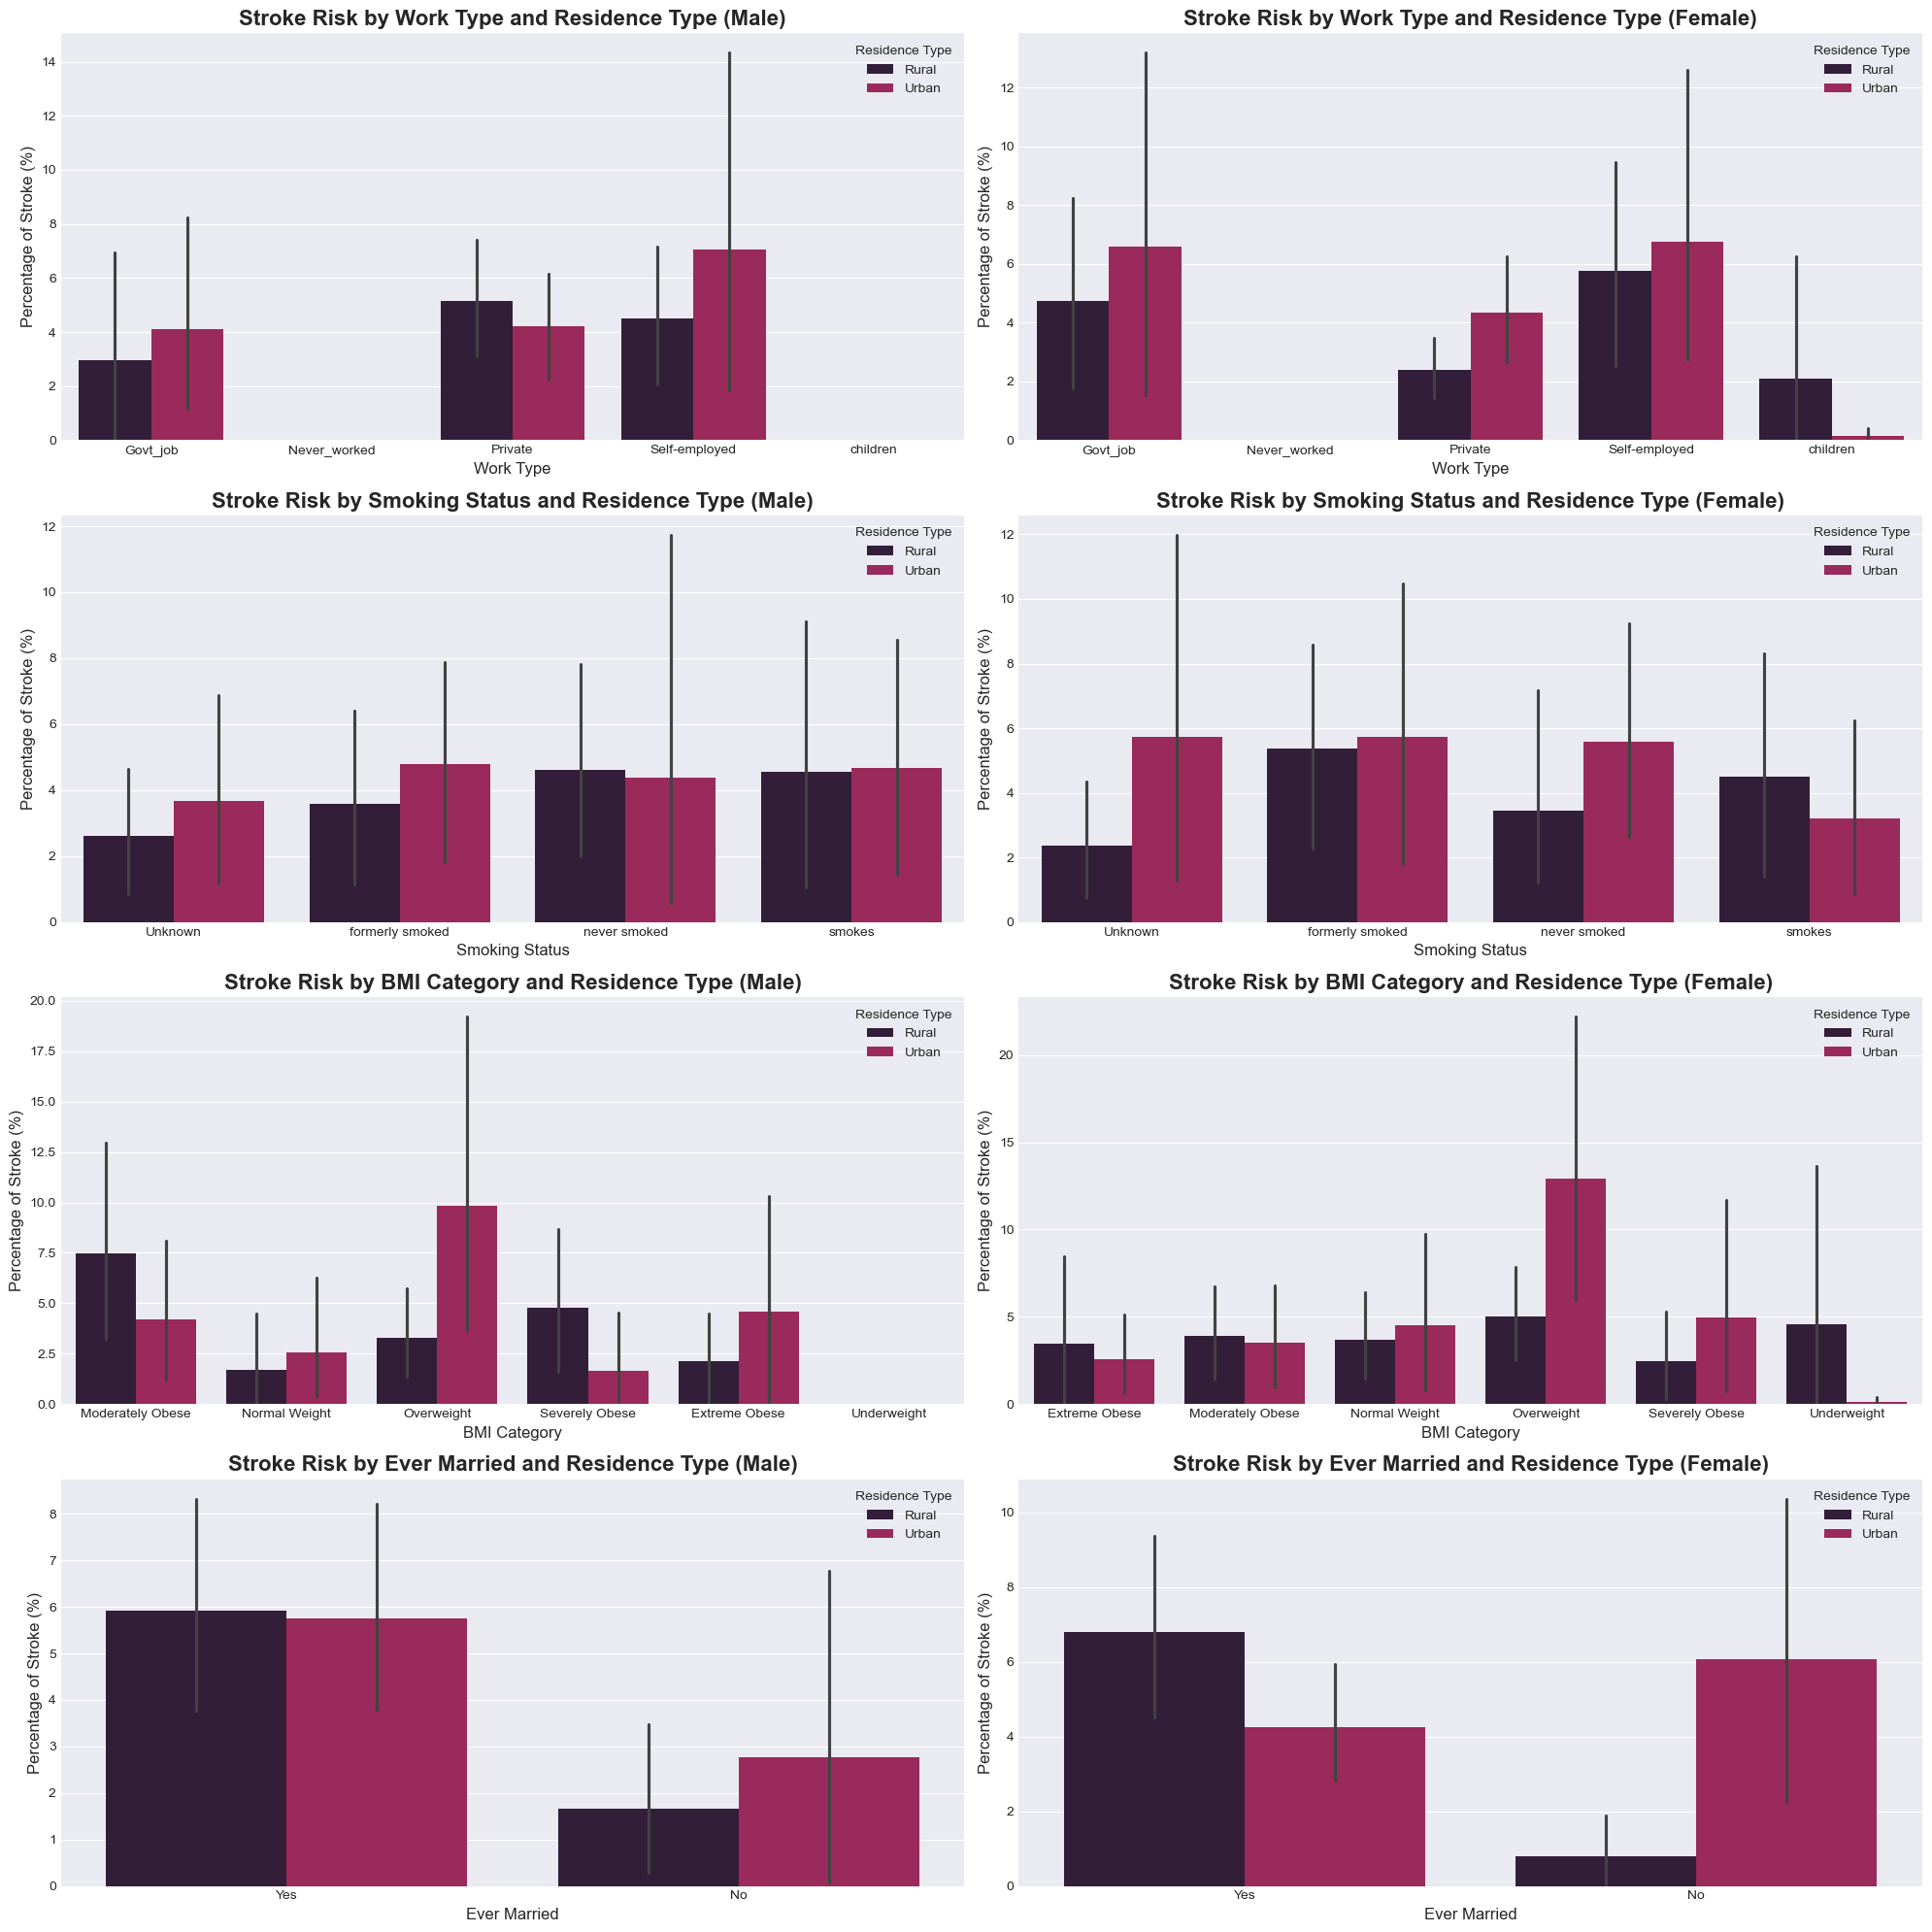

In [168]:
# Assuming df is already loaded
# Grouping data for both genders
df_grouped = df.groupby(['Gender', 'Work_Type', 'Residence_Type', 'Smoking_Status', 'BMI_Group', 'Ever_Married', 'Stroke']).size().unstack(fill_value=0)

# Calculating percentages
df_grouped_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Creating subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Plotting for Male and Female for different attributes
genders = ['Male', 'Female']

for i, gender in enumerate(genders):
    # Filter data for the specific gender
    df_gender = df_grouped_percent.loc[gender]

    # Stroke Risk by Work_Type and Residence_Type
    sns.barplot(x=df_gender.index.get_level_values('Work_Type'),
                y=df_gender[1],
                hue=df_gender.index.get_level_values('Residence_Type'),
                palette=['#35193e', '#ad1759'], ax=axes[0, i])
    
    axes[0, i].set_title(f'Stroke Risk by Work Type and Residence Type ({gender})', fontsize=16, fontweight='bold')
    axes[0, i].set_xlabel('Work Type', fontsize=12)
    axes[0, i].set_ylabel('Percentage of Stroke (%)', fontsize=12)
    axes[0, i].legend(title='Residence Type')

    # Stroke Risk by Smoking_Status and Residence_Type
    sns.barplot(x=df_gender.index.get_level_values('Smoking_Status'),
                y=df_gender[1],
                hue=df_gender.index.get_level_values('Residence_Type'),
                palette=['#35193e', '#ad1759'], ax=axes[1, i])

    axes[1, i].set_title(f'Stroke Risk by Smoking Status and Residence Type ({gender})', fontsize=16, fontweight='bold')
    axes[1, i].set_xlabel('Smoking Status', fontsize=12)
    axes[1, i].set_ylabel('Percentage of Stroke (%)', fontsize=12)
    axes[1, i].legend(title='Residence Type')

    # Stroke Risk by BMI_Group and Residence_Type
    sns.barplot(x=df_gender.index.get_level_values('BMI_Group'),
                y=df_gender[1],
                hue=df_gender.index.get_level_values('Residence_Type'),
                palette=['#35193e', '#ad1759'], ax=axes[2, i])

    axes[2, i].set_title(f'Stroke Risk by BMI Category and Residence Type ({gender})', fontsize=16, fontweight='bold')
    axes[2, i].set_xlabel('BMI Category', fontsize=12)
    axes[2, i].set_ylabel('Percentage of Stroke (%)', fontsize=12)
    axes[2, i].legend(title='Residence Type')

    # Stroke Risk by Ever_Married and Residence_Type
    sns.barplot(x=df_gender.index.get_level_values('Ever_Married'),
                y=df_gender[1],
                hue=df_gender.index.get_level_values('Residence_Type'),
                palette=['#35193e', '#ad1759'], ax=axes[3, i])

    axes[3, i].set_title(f'Stroke Risk by Ever Married and Residence Type ({gender})', fontsize=16, fontweight='bold')
    axes[3, i].set_xlabel('Ever Married', fontsize=12)
    axes[3, i].set_ylabel('Percentage of Stroke (%)', fontsize=12)
    axes[3, i].legend(title='Residence Type')

plt.tight_layout()
plt.show()

---

- We wanted to examine how the lifestyles of **Men and Women** affect **stroke** 🧠, specifically for **residence type**.

- Significant differences were observed for **Women and Men** 👩‍⚕️👨‍⚕️. For example, the effect of **marital status** 💍 on stroke is different for women and men (last graph).

- As can be seen from the graphs, the effects of lifestyles and **residence** 🏠 on **stroke** are significant.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> What patterns emerge when analyzing age and lifestyle factors together?
</span>

How does stroke probability change as more risk factors overlap (e.g., age > 60, smoking, and heart disease)?

In [175]:
df_60 = df.copy()

In [176]:
def create_composite_variable(df, columns, separator='_'):
    """
    Verilen kolonları birleştirerek yeni bir değişken oluşturur.
    
    Args:
        df: DataFrame
        columns: Birleştirilecek kolon isimleri listesi
        separator: Kolonları birleştirirken kullanılacak ayraç
    
    Returns:
        Birleştirilmiş string
    """
    return df[columns].astype(str).agg(separator.join, axis=1)

def filter_by_age_group(df):
    """
    Yaş gruplarına göre veriyi filtreler ve her grup için composite değişkenler oluşturur.
    
    Args:
        df: İşlenecek DataFrame
    
    Returns:
        Dictionary of DataFrames, her yaş grubu için bir DataFrame içerir
    """
    # Birleştirilecek değişkenler
    composite_columns = ['Ever_Married', 'Smoking_Status', 'Residence_Type']
    
    # Yaş gruplarına göre filtreleme
    age_groups = {
        'middle': (df['Age'] >= 40) & (df['Age'] < 60),
        'young': df['Age'] < 40,
        'elderly': df['Age'] >= 60
    }
    
    result = {}
    for group_name, age_filter in age_groups.items():
        # Filtrelenmiş DataFrame
        filtered_df = df[age_filter].copy()
        
        # Composite değişken oluşturma
        filtered_df[f'Composite_Variable_{group_name}'] = create_composite_variable(
            filtered_df, 
            composite_columns
        )
        
        result[group_name] = filtered_df
        
    return result

# Kullanım örneği:
filtered_data = filter_by_age_group(df_60)

In [177]:
# Tüm yaş grupları için filtrelenmiş verileri al
filtered_data = filter_by_age_group(df_60)

# Belirli bir yaş grubunun verisine erişim
young_data = filtered_data['young']
middle_age_data = filtered_data['middle']
elderly_data = filtered_data['elderly']

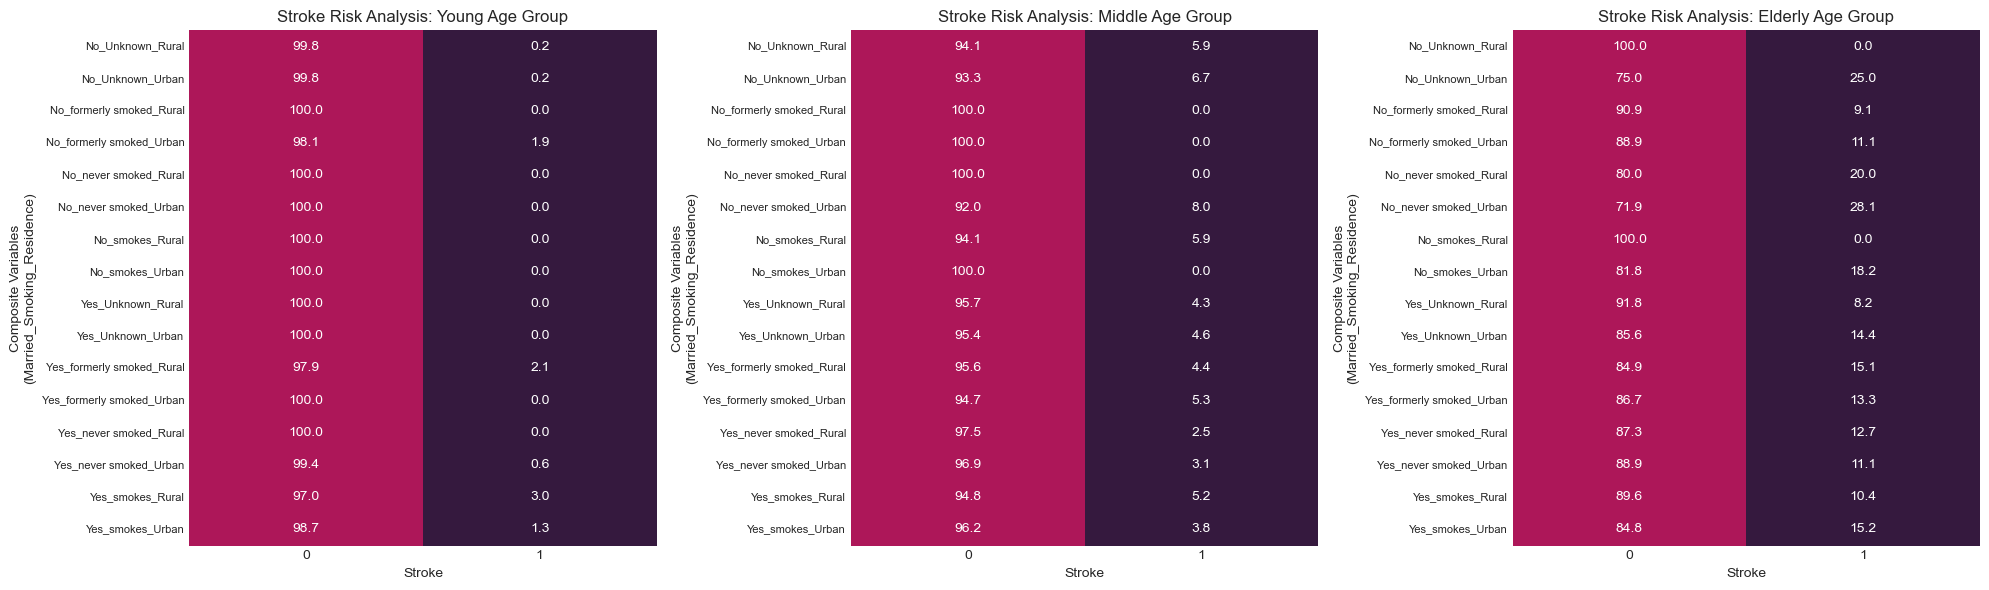

In [178]:
def create_stroke_heatmaps(filtered_data, df_original, age_groups=['young', 'middle', 'elderly']):
    """
    Her yaş grubu için stroke oranlarını gösteren heatmap'ler oluşturur.
    
    Args:
        filtered_data: Yaş gruplarına göre filtrelenmiş veriler (dictionary)
        df_original: Orijinal DataFrame
        age_groups: Analiz edilecek yaş grupları
    """
    # Grafik alanını oluştur
    fig, axes = plt.subplots(1, len(age_groups), figsize=(20, 6))
    
    # Her yaş grubu için heatmap oluştur
    for idx, group in enumerate(age_groups):
        # Crosstab ve yüzde hesaplama
        counts = pd.crosstab(filtered_data[group][f'Composite_Variable_{group}'], 
                           df_original['Stroke'])
        percentages = counts.div(counts.sum(axis=1), axis=0) * 100
        
        # Heatmap çizimi
        sns.heatmap(percentages, 
                   annot=True, 
                   fmt=".1f", 
                   cmap=dark_purple_rose_red_cmap, 
                   cbar=False, 
                   ax=axes[idx])
        
        # Grafik başlıkları ve etiketleri
        axes[idx].set_title(f'Stroke Risk Analysis: {group.replace("_", " ").title()} Age Group')
        axes[idx].set_xlabel('Stroke')
        axes[idx].set_ylabel('Composite Variables\n(Married_Smoking_Residence)')
        
        # Y eksen etiketlerini daha okunabilir yap
        axes[idx].tick_params(axis='y', labelsize=8)
    
    # Grafiklerin düzenlenmesi
    plt.tight_layout()
    return fig

# Kullanım örneği:
def analyze_stroke_risk(df_60):
    # Önce verileri filtrele
    filtered_data = filter_by_age_group(df_60)
    
    # Heatmap'leri oluştur
    fig = create_stroke_heatmaps(filtered_data, df_60)
    
    # Grafiği göster
    plt.show()
    
    return filtered_data

# Analizi çalıştır
filtered_results = analyze_stroke_risk(df_60)

---

- **Young Age Group** (Left Heat Map):

- Most stroke cases (indicated by column 1) occur at very low rates across all variables 💭.

- Stroke probabilities are significantly lower in individuals who are nonsmokers 🚭 or whose **urban/rural** status is unknown.

- **Middle Age Group** (Middle Heat Map):

- Stroke cases (1) begin to occur at slightly higher rates than in the younger group 📈, especially in smokers 🚬 or in individuals with a mixed base condition.

- For example, there is a clear concentration of values ​​associated with stroke in the “nonsmoking, rural” groups 🌄.

- **Older Age Group** (Right Heat Map):
- Stroke rates increase significantly 🧠 (e.g., rates of 25% or higher among those with a history of smoking in rural groups).
- Significant differences are seen between rural and urban populations 🌍, especially for those who smoke or have known cardiovascular risk factors.

**Implications**:
- **Age Relationship**: The risk of stroke increases significantly with age 📊. This is clearly seen in the transition from the left map to the right map.
- **Smoking and Rural Effect**: Smoking stands out as a significant risk factor 🚬. Rural populations in older age groups are at higher risk compared to urban populations.
- **Preventive Focus**: While preventive measures such as smoking cessation may be more effective in young and middle age groups 🚭, targeted health interventions may be needed for older groups ⚕️.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Does marital status (ever_married) correlate with stroke likelihood?
</span>

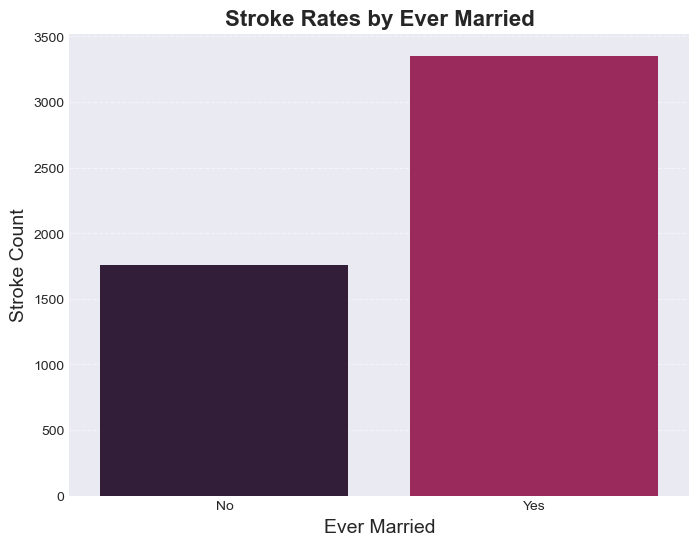

In [185]:
residence_stroke_data = df.groupby('Ever_Married')['Stroke'].count().reset_index()

plt.figure(figsize=(8, 6))

custom_palette = ["#35193e", "#ad1759"]

sns.barplot(
    data=residence_stroke_data, 
    x='Ever_Married', 
    y='Stroke', 
    palette=custom_palette
)

plt.title('Stroke Rates by Ever Married', fontsize=16, fontweight='bold')
plt.xlabel('Ever Married', fontsize=14)
plt.ylabel('Stroke Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

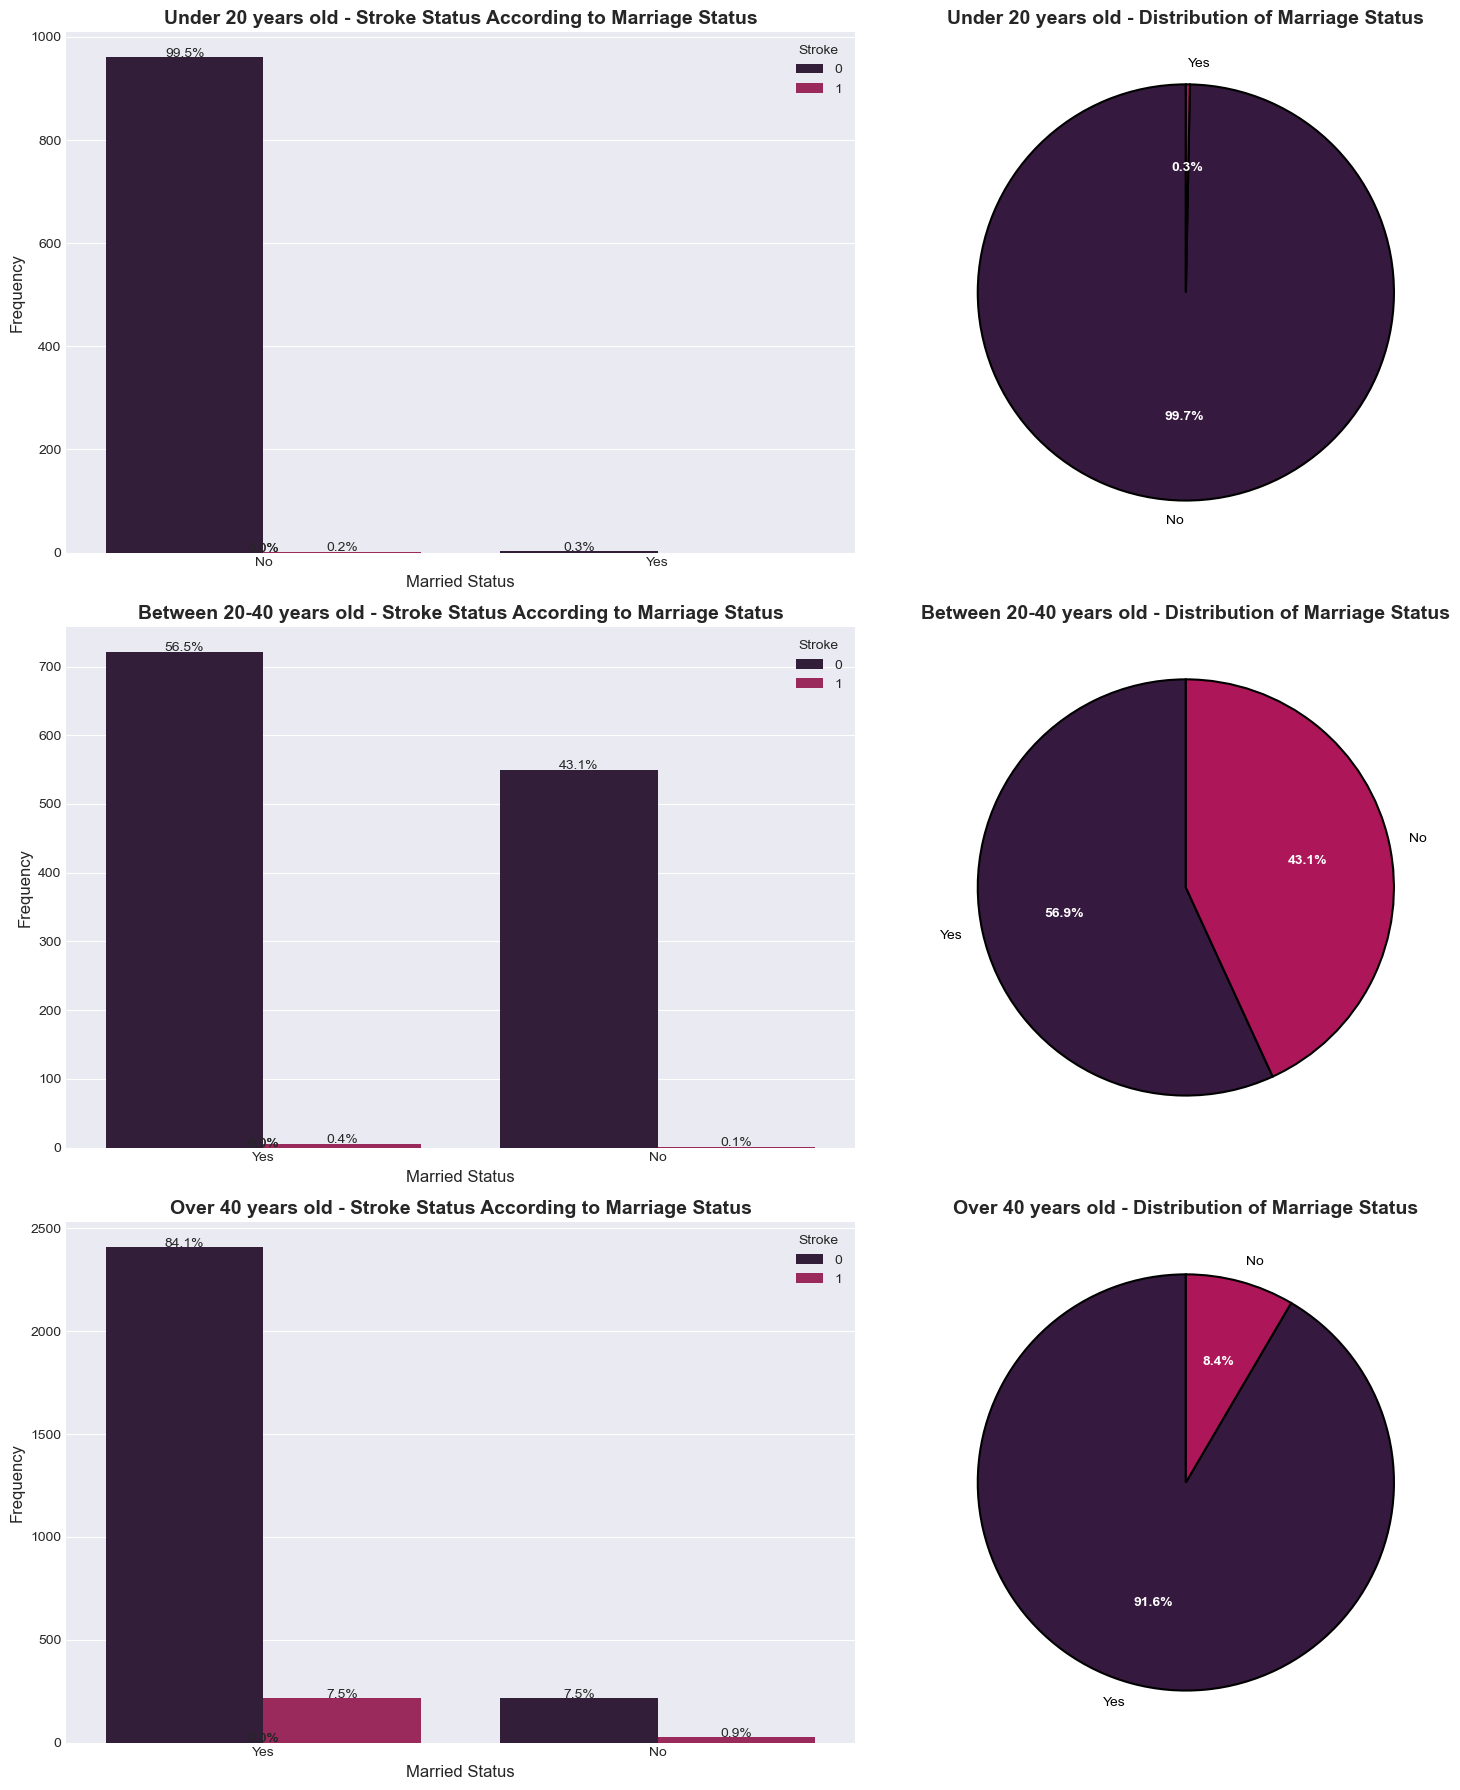

In [186]:
under_20 = df[df['Age'] < 20]
between_20_40 = df[(df['Age'] >= 20) & (df['Age'] <= 40)]
over_40 = df[df['Age'] > 40]

age_groups = {
    "Under 20 years old": under_20,
    "Between 20-40 years old": between_20_40,
    "Over 40 years old": over_40
}

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

custom_palette = ["#35193e", "#ad1759"]

for idx, (group_name, group_data) in enumerate(age_groups.items()):
    ever_married_value = group_data['Ever_Married'].value_counts()
    countplot = sns.countplot(data=group_data, 
                              x='Ever_Married', 
                              palette=custom_palette, 
                              ax=axes[idx][0], 
                              hue='Stroke')
    axes[idx][0].set_title(f'{group_name} - Stroke Status According to Marriage Status', fontsize=14, fontweight='bold')
    axes[idx][0].set_xlabel('Married Status', fontsize=12)
    axes[idx][0].set_ylabel('Frequency', fontsize=12)

    total = len(group_data)
    for p in countplot.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        countplot.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.1f}%', ha="center", fontsize=10)

    wedges, texts, autotexts = axes[idx][1].pie(
        ever_married_value, 
        labels=ever_married_value.index, 
        colors=custom_palette, 
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
    )
    axes[idx][1].set_title(f'{group_name} - Distribution of Marriage Status', fontsize=14, fontweight='bold')
    
    for text in texts:
        text.set_color("black")  
    for autotext in autotexts:
        autotext.set_color("white")  
        autotext.set_fontweight("bold") 

plt.tight_layout()
plt.show()


---

- **First, the distribution of marriages according to the determined age groups is shown** 📊. (See: pie chart)
- **Stroke rates according to marriage status for the determined age ranges are shown with a barchart** 📈.
- **Accordingly, it has been observed that individuals who are married and over the age of 40 have a very high risk of stroke** ⚠️.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Are there regional trends in stroke occurrence (Urban vs Rural)?
</span>

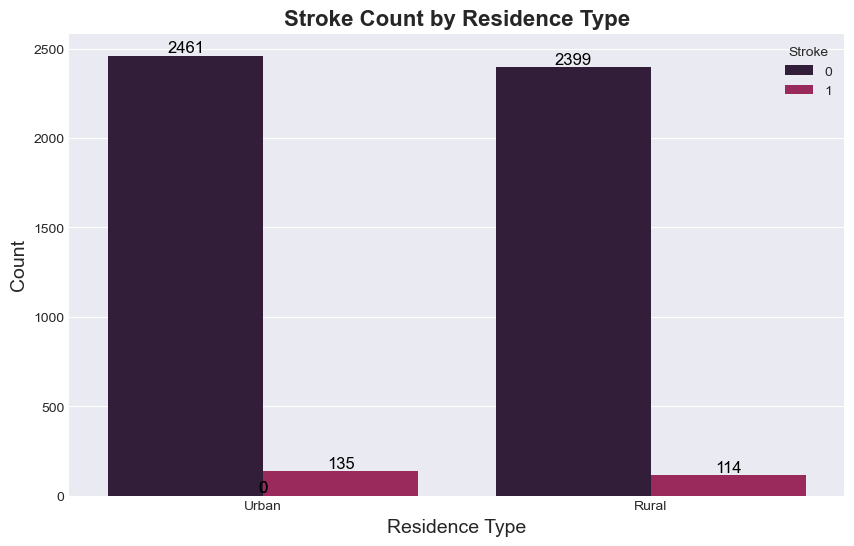

In [193]:
# Grafik boyutunu ayarla
plt.figure(figsize=(10, 6))

# Dark Purple ve Rose Red renklerini tanımla
custom_palette = ["#35193e", "#ad1759"]

# 'Residence_Type' ve 'Stroke' için countplot
ax = sns.countplot(x='Residence_Type', hue='Stroke', data=df, palette=custom_palette)

# Her barın üzerine sayıları ekle
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()

    ax.text(x + width / 2, height + 0.05, f'{int(height)}', ha='center', va='bottom', fontsize=12, color='black')

# Grafik başlığı ve eksen etiketleri
plt.title('Stroke Count by Residence Type', fontsize=16, fontweight='bold')
plt.xlabel('Residence Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Grafiği göster
plt.show()


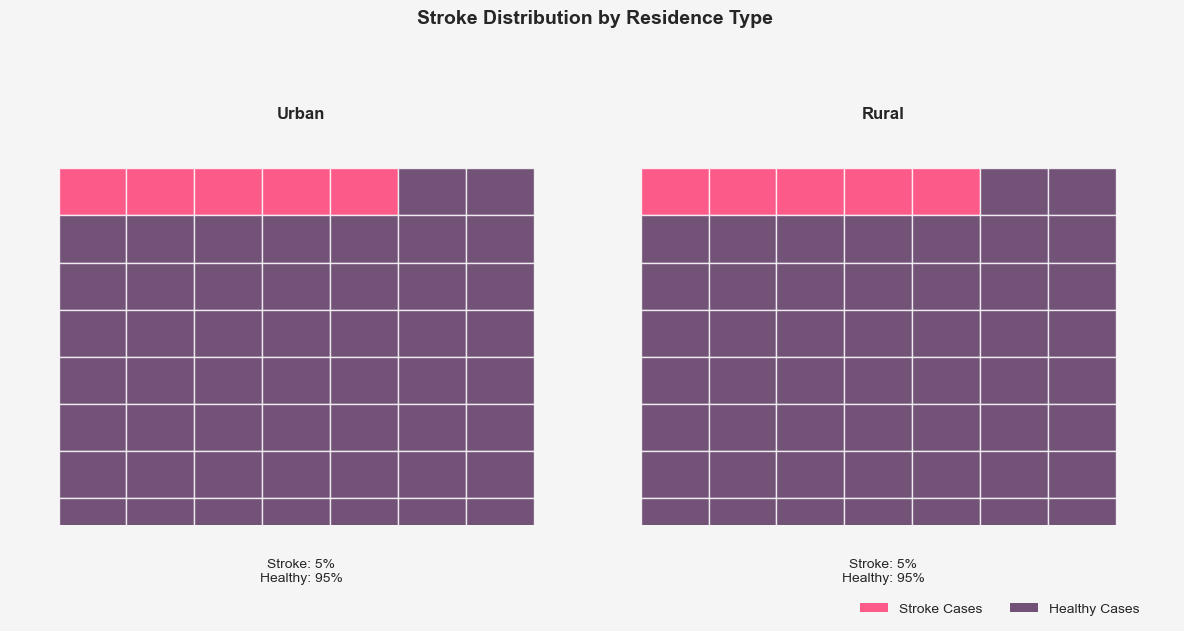

In [194]:
stroke_home = df[df['Stroke'] == 1]['Residence_Type'].value_counts()
healthy_home = df[df['Stroke'] == 0]['Residence_Type'].value_counts()
urban = df['Residence_Type'].value_counts().values[0]
rural = df['Residence_Type'].value_counts().values[1]
stroke_urban = int(round(stroke_home.values[0] / urban * 100, 0))
stroke_rural = int(round(stroke_home.values[1] / rural * 100, 0))
healthy_urban = int(round(healthy_home.values[0] / urban * 100, 0))
healthy_rural = int(round(healthy_home.values[1] / rural * 100, 0))
urban_per = int(round(urban / (urban + rural) * 100, 0))
rural_per = int(round(rural / (urban + rural) * 100, 0))

# Create figure
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
ax.set_facecolor('#f6f5f5')
fig.patch.set_facecolor('#f6f5f5')

# Define grid size
ncols = 7
nrows = 7

# Create Urban and Rural sections
urban_values = [stroke_urban, healthy_urban]
rural_values = [stroke_rural, healthy_rural]
colors = ['#fe346e', '#512b58']

# Plot Urban Waffle
def plot_waffle_section(values, colors, start_x, ax, title):
    for i in range(values[0]):  # Stroke cases
        row = i // ncols
        col = i % ncols
        ax.add_patch(patches.Rectangle(
            (col * 0.14 + start_x, 0.72 - row * 0.14),
            0.14, 0.14,
            facecolor=colors[0],
            alpha=0.8,
            edgecolor='white'
        ))
    
    for i in range(values[1]):  # Healthy cases
        row = (values[0] + i) // ncols
        col = (values[0] + i) % ncols
        ax.add_patch(patches.Rectangle(
            (col * 0.14 + start_x, 0.72 - row * 0.14),
            0.14, 0.14,
            facecolor=colors[1],
            alpha=0.8,
            edgecolor='white'
        ))
    
    # Add title
    ax.text(start_x + 0.5, 1.0, title, 
            ha='center', va='bottom', 
            fontsize=12, fontweight='bold')
    
    # Add percentage labels
    ax.text(start_x + 0.5, -0.3, 
            f'Stroke: {values[0]}%\nHealthy: {values[1]}%',
            ha='center', va='top',
            fontsize=10)

# Plot both sections
plot_waffle_section(urban_values, colors, 0, ax, 'Urban')
plot_waffle_section(rural_values, colors, 1.2, ax, 'Rural')

# Add legend
legend_elements = [
    patches.Patch(facecolor=colors[0], alpha=0.8, label='Stroke Cases'),
    patches.Patch(facecolor=colors[1], alpha=0.8, label='Healthy Cases')
]
ax.legend(handles=legend_elements, loc='upper center', 
         bbox_to_anchor=(0.85, -0.15),
         ncol=2, frameon=False)

# Set limits and hide axes
ax.set_xlim(-0.1, 2.3)
ax.set_ylim(-0.2, 1.1)
ax.axis('off')

# Add title
plt.suptitle('Stroke Distribution by Residence Type', 
             y=1.05, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---

- **According to our results, there is no difference between rural and urban** 🏙️🌳.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> How are continuous variables related to categorical variables?
</span>

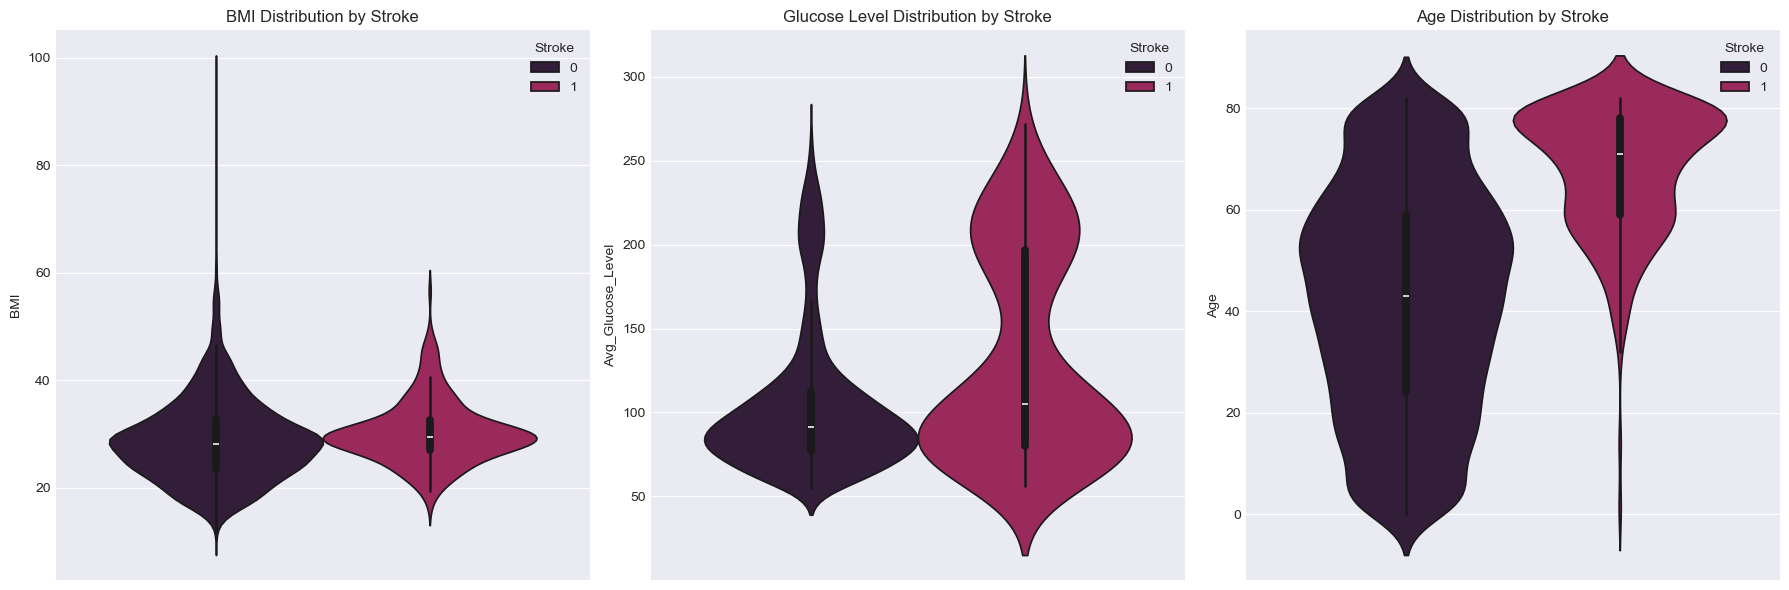

In [201]:
# Violin plot için figure
plt.figure(figsize=(18, 6))

# 1. Violin plot: BMI ve Stroke
plt.subplot(1, 3, 1)
sns.violinplot(y='BMI', hue='Stroke', data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title('BMI Distribution by Stroke')

# 2. Violin plot: Glucose Level ve Stroke
plt.subplot(1, 3, 2)
sns.violinplot(y='Avg_Glucose_Level', hue='Stroke', data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title('Glucose Level Distribution by Stroke')

# 3. Violin plot: Age ve Stroke
plt.subplot(1, 3, 3)
sns.violinplot(y='Age', hue='Stroke', data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title('Age Distribution by Stroke')

# Düzeni sıkıştırarak grafiklerin daha net görünmesini sağla
plt.tight_layout()
plt.show()

---

- **BMI Distribution (According to Stroke Status)**:
It is observed that the body mass index (BMI) of individuals who have had a stroke is generally higher 📊.

The BMI distribution in those who have had a stroke is more intense and distinct, especially in the 30-40 range.

- **Glucose Level Distribution (According to Stroke Status)**:
The average glucose levels of individuals who have had a stroke are higher than those who have not 🍬.

Glucose levels above 150 are more common in those who have had a stroke.

- **Age Distribution (According to Stroke Status)**:
The probability of having a stroke increases as age increases 🧑‍🦳.
While the majority of individuals who have had a stroke are 60 years old and above, this situation is less common in the younger age group (20-40).

- **Conclusion**:
This analysis indicates that BMI, glucose level and age may have a significant relationship with stroke 🔍. Further analysis can investigate the effects of these factors on increasing the risk of stroke.

---

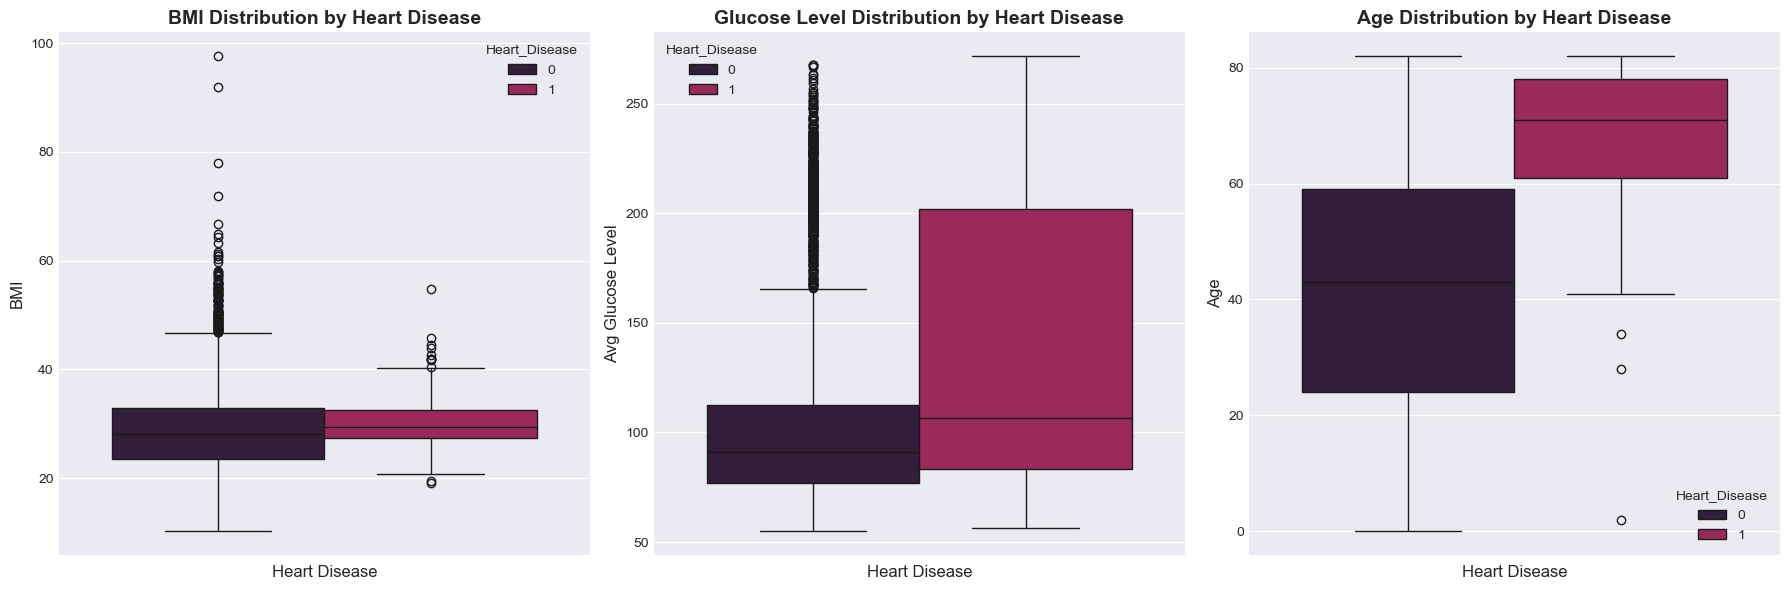

In [207]:
# Dark Purple ve Rose Red renklerini tanımla
custom_palette = ["#35193e", "#ad1759"]

# Violin plot için figure
plt.figure(figsize=(18, 6))

# 1. Violin plot: BMI ve Stroke
plt.subplot(1, 3, 1)
sns.boxplot(
    y='BMI', hue='Heart_Disease', data=df, dodge=True, width=0.8, palette=custom_palette
)
plt.title('BMI Distribution by Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('BMI', fontsize=12)

# 2. Violin plot: Glucose Level ve Stroke
plt.subplot(1, 3, 2)
sns.boxplot(
    y='Avg_Glucose_Level', hue='Heart_Disease', data=df, dodge=True, width=0.8, palette=custom_palette
)
plt.title('Glucose Level Distribution by Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Avg Glucose Level', fontsize=12)

# 3. Violin plot: Age ve Stroke
plt.subplot(1, 3, 3)
sns.boxplot(
    y='Age', hue='Heart_Disease', data=df, dodge=True, width=0.8, palette=custom_palette
)
plt.title('Age Distribution by Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Düzeni sıkıştırarak grafiklerin daha net görünmesini sağla
plt.tight_layout()
plt.show()


---

- **BMI Distribution (According to Heart Disease Status)**:
BMI is generally observed to be slightly higher in individuals with heart disease 🏋️‍♂️.
However, there is no significant difference between the two groups; the distribution is similar.

- **Glucose Level Distribution (According to Heart Disease Status)**:
The average glucose levels of individuals with heart disease are much higher than those without 🍬.
Heart disease is more common in individuals with glucose levels, especially above 150.

- **Age Distribution (According to Heart Disease Status)**:
Heart disease is more common in older individuals 🧓.
The average age is lower in individuals without heart disease.

- **Conclusion**:
This analysis shows that age and glucose levels may be important factors in the risk of heart disease. The effect of BMI is less clear ⚖️.

---

In [ ]:
# custom_palette renk paletini tanımlayın (örneğin)
custom_palette = ['#35193e', '#ad1759']

# Swarm plot için figure
plt.figure(figsize=(18, 6))

# 1. Swarm plot: BMI ve Hypertension
plt.subplot(1, 3, 1)
sns.swarmplot(y='BMI', hue='Hypertension', data=df, dodge=True, palette=custom_palette)
plt.title('BMI Distribution by Hypertension')

# 2. Swarm plot: Glucose Level ve Hypertension
plt.subplot(1, 3, 2)
sns.swarmplot(y='Avg_Glucose_Level', hue='Hypertension', data=df, dodge=True, palette=custom_palette)
plt.title('Glucose Level Distribution by Hypertension')

# 3. Swarm plot: Age ve Hypertension
plt.subplot(1, 3, 3)
sns.swarmplot(y='Age', hue='Hypertension', data=df, dodge=True, palette=custom_palette)
plt.title('Age Distribution by Hypertension')

# Düzeni sıkıştırarak grafiklerin daha net görünmesini sağla
plt.tight_layout()
plt.show()

---

- **BMI Distribution (According to Hypertension)**:
-Individuals with hypertension generally have higher BMI values ​​🏋️‍♂️.
- Hypertension is more common especially when BMI is over 30.

- **Glucose Level Distribution (According to Hypertension)**:
- Individuals with hypertension generally have higher glucose levels 🍬.
- Hypertension is more common in individuals with glucose levels over 150.

- **Age Distribution (According to Hypertension)**:
- Hypertension increases with age 🧓.
- Individuals with hypertension are generally concentrated in the age group of 40 and above.

- **Conclusion**:
- This analysis shows that BMI, glucose level and age can be strongly associated with hypertension ⚖️.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.
</span>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn as sns

# Assuming df is your DataFrame, make sure it's properly defined and imported before this code.

fig = plt.figure(figsize=(12,6), dpi=100)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Assuming 'Stroke', 'gender', and 'glucose_cat' are columns in your DataFrame `df`
healthy = df[df['Stroke'] == 0]
stroke = df[df['Stroke'] == 1]

gender_order = ['Female', 'Male']
glucose_order = ['Low', 'Normal', 'High', 'Very High']

col1 = ["#4b4b4c", "#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = ["#4b4b4c", "#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['Gender'], [stroke['Glucose_Level_Group']], normalize='index').loc[gender_order, glucose_order]
no_stroke = pd.crosstab(healthy['Gender'], [healthy['Glucose_Level_Group']], normalize='index').loc[gender_order, glucose_order]

sns.heatmap(ax=ax0, data=stroke, linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col1, annot=True, fmt='1.0%', annot_kws={"fontsize":14}, alpha=0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col2, annot=True, fmt='1.0%', annot_kws={"fontsize":14}, alpha=0.9)

ax0.text(0, -1., 'Distribution of Strokes with Gender & Glucose level', {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})
ax0.text(0, -0.75, 'Clearly, irrespective of gender, elderly men and women are prone to heart strokes.', {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

#ax0.axes.set_xticklabels(glucose_order, {'font': 'serif', 'color': 'black', 'size': 12})
#ax1.axes.set_xticklabels(glucose_order, {'font': 'serif', 'color': 'black', 'size': 12})

#ax0.axes.set_yticklabels(gender_order, {'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)

plt.show()


---

### Low Glucose Levels:
- Women (42%) have a higher risk of stroke at low glucose levels 📉 than men (28%) 📉.
- This suggests that women may be more sensitive to low glucose levels 👩‍⚕️⚠️.

### Normal and High Glucose Levels:
- There is no significant difference in stroke risk for either gender 🟰.
- Stroke rates range from about 26-32% at normal and high glucose levels ⚖️.

### Very High Glucose Levels:
- Stroke rates are low at very high glucose levels ⬇️.
- Around 5% in women and 10% in men 📊.

### Stroke-Free Group:
- A similar distribution is observed between those who have not had a stroke at low and normal glucose levels 🔄.
- Rates range from about 40-49% 🔍.

### Conclusion:
- Low glucose levels appear to increase the risk of stroke, especially in women 🚨💡.

---

In [ ]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['Stroke']==0]
stroke = df[df['Stroke']==1]


col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['Hypertension'],[stroke['Heart_Disease']],normalize='index')
no_stroke = pd.crosstab(healthy['Hypertension'],[healthy['Heart_Disease']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Hypertension & Heart disease', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
#ax0.text(0, -0.42, 'People with no heart condtion but hypertension \nare having most of the strokes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

#ax0.axes.set_xticklabels(['Well heart', 'Ill heart'], {'font':'serif', 'color':'black', 'size':16})
#ax1.axes.set_xticklabels(['Well heart', 'Ill heart'], {'font':'serif', 'color':'black', 'size':16})

#ax0.axes.set_yticklabels(['No hypertension', 'Have hypertension'], {'font':'serif', 'color':'black', 'size':16}, rotation= 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

---

### This Chart Shows the Effect of Hypertension and Heart Disease on Stroke.

### Those Without Hypertension/Heart Disease (0):
- Stroke Rate: 81% 🚨
- Stroke-Free Rate: 96% ✅
- This group appears to have a very high rate of stroke. This is unexpected and may be due to other risk factors or some problems with the data collection method 🤔.
- Those With Hypertension/Heart Disease (1):
- Stroke Rate: 20% ⚖️
- Stroke-Free Rate: 12% 🔽
- This group appears to have a lower rate of stroke. Individuals with hypertension or heart disease may have a lower rate of stroke than expected.

#### Things to Consider:

- Other Risk Factors: Factors other than hypertension and heart disease may significantly affect the risk of stroke. For example, genetic factors, lifestyle, dietary habits or physical activity status should also be taken into account 🧠💪.

- Data Collection and Analysis Method: There may be a problem with the data collection methods. For example, missing data, incorrect labeling or sampling errors may skew the analysis results 🔍📊.

---

<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions
</span>

# 🏥 Results and Evaluation

This study analyzed **stroke (paralysis) risk factors** and examined which variables have an effect on the probability of having a stroke with visualized data. In light of the analyses and graphs, the following basic findings emerged:

## 📊 Basic Findings

### 🧑‍🦳 Age and Stroke Risk
📌 The graphs show that **age is an important factor** in stroke risk.

📌 It is seen that stroke cases increase significantly, especially in **older age groups**.

### 🚹🚺 Effect of Gender
📌 Significant differences were observed in terms of stroke risk between **men and women**.

📌 However, this difference can be more clearly understood when **evaluated together with other variables**.

### 💉 The Role of Hypertension and Diabetes
📌 It is clearly seen that stroke rates are higher in individuals with a history of hypertension and diabetes.

📌 This supports the medical literature that **chronic diseases** increase the risk of stroke.

### 🚬 Smoking
📌 Stroke rates have been determined to be higher in individuals who smoke.

📌 This finding reveals the negative effects of smoking on **vascular health**.

### ⚖️ Body Mass Index (BMI) and Stroke
📌 Stroke cases have been observed to be more common in **obese or overweight individuals**.

📌 **Maintaining a healthy weight** may be an important factor in reducing the risk of stroke.

### 💼 Occupation and Socioeconomic Factors
📌 It has been observed that stroke rates may be higher in individuals with **low income** or **working in stressful professions**.

### 🏃‍♂️ Physical Activity and Lifestyle
📌 It is understood from the graphs that the risk of stroke is lower in individuals who do **regular physical activity**.

📌 This shows the **preventive effect of a healthy lifestyle**.

---

## 🏆 General Assessment

📌 **Obtained data** show that stroke risk factors are largely related to **lifestyle, chronic diseases and demographic characteristics**.

✅ **Recommended Strategies:**
🔹 **Developing preventive health policies** 🏛️
🔹 **Fighting against smoking and obesity** 🚭⚖️
🔹 **Encouraging physical activity** 🏋️‍♀️
🔹 **Increasing awareness-raising activities for older age groups** 🎓

📌 **These results, supported by further analysis, can guide individual and social health policies.**

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Congratulations!</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |